In [1]:
from dataclasses import dataclass
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
@dataclass
class Result:
    prompt: str
    subject: str
    object: str
    logit_diff: float
    clean_pred: str
    ablated_pred: str
    clean_completion: str
    ablated_completion: str
    found_features: list
    min_features: list = None
    min_ablated_completion: str = None
    min_ablation_num: int = None
    feature_diffs: dict = None

    def __str__(self):
        out = f"Result for '{self.prompt}'\n\tLogit diff: {self.logit_diff}\n\t'{self.clean_pred}' -> '{self.ablated_pred}'\n\t'{self.clean_completion}' -> '{self.ablated_completion}'\n\tAll features: {self.found_features}"
        if self.min_features:
            out += f"\n\tMin features: {self.min_features}"
        if self.min_ablated_completion:
            out += f"\n\tMin ablated completion: '{self.min_ablated_completion}'"
        if self.min_ablation_num:
            out += f"\n\tMin ablation num: '{self.min_ablation_num}'"

        return out + "\n"

    def __repr__(self):
        return str(self)

In [32]:
with open("results_65_fixed.pkl", "rb") as f:
    results = pickle.load(f)

data = {
    "example": [],
    "prompt": [],
    "subject": [],
    "object": [],
    "logit_diff": [],
    "clean_pred": [],
    "ablated_pred": [],
    "clean_completion": [],
    "ablated_completion": [],
    "found_features": [],
    "min_features": [],
    "min_ablated_completion": [],
    "min_ablation_num": [],
    "feature_diffs": [],
    "num_found_to_min_diff" : []
}

for result in results:
    data["example"].append(f"{result.prompt}->{result.object}")
    data["prompt"].append(result.prompt)
    data["subject"].append(result.subject)
    data["object"].append(result.object)
    data["logit_diff"].append(result.logit_diff)
    data["clean_pred"].append(result.clean_pred)
    data["ablated_pred"].append(result.ablated_pred)
    data["clean_completion"].append(result.clean_completion)
    data["ablated_completion"].append(result.ablated_completion)
    data["found_features"].append(result.found_features)
    data["min_features"].append(result.min_features)
    data["min_ablated_completion"].append(result.min_ablated_completion)
    data["min_ablation_num"].append(result.min_ablation_num)
    data["feature_diffs"].append(result.feature_diffs)
    data["num_found_to_min_diff"].append(len(result.found_features) - len(result.min_features))


output_df = pd.DataFrame(data)

output_df.head(5)

example  \
0                  Barack Obama was born in-> Hawaii   
1            George Bush was the governor of-> Texas   
2                          Beats is owned by-> Apple   
3           Bill Gates is the founder of-> Microsoft   
4  The Dalai Lama is a spiritual leader from-> Tibet   

                                      prompt       subject      object  \
0                   Barack Obama was born in  Barack Obama      Hawaii   
1            George Bush was the governor of   George Bush       Texas   
2                          Beats is owned by         Beats       Apple   
3               Bill Gates is the founder of    Bill Gates   Microsoft   
4  The Dalai Lama is a spiritual leader from    Dalai Lama       Tibet   

   logit_diff  clean_pred ablated_pred  \
0   -0.297400      Hawaii       Hawaii   
1   -6.050306       Texas      Florida   
2   -2.508337       Apple          the   
3   -4.344580   Microsoft          the   
4   -3.886837       Tibet        India   

                                    clean_completion  \
0  <bos>Barack Obama was born in Hawaii, but he w...   
1  <bos>George Bush was the governor of Texas whe...   
2  <bos>Beats is owned by Apple, and the company ...   
3  <bos>Bill Gates is the founder of Microsoft an...   
4  <bos>The Dalai Lama is a spiritual leader from...   

                                  ablated_completion  \
0  <bos>Barack Obama was born in Hawaii, but he g...   
1  <bos>George Bush was the governor of Florida w...   
2  <bos>Beats is owned by the company that owns t...   
3  <bos>Bill Gates is the founder of the Bill and...   
4  <bos>The Dalai Lama is a spiritual leader from...   

                                      found_features  \
0  [(layer_6/width_65k/average_l0_101, 62465, 1.2...   
1  [(layer_20/width_65k/average_l0_88, 6027, 11.4...   
2  [(layer_0/width_65k/average_l0_72, 57583, 1.11...   
3  [(layer_14/width_65k/average_l0_89, 64282, 2.2...   
4  [(layer_12/width_65k/average_l0_96, 39708, 3.3...   

                                        min_features  \
0  [(layer_6/width_65k/average_l0_101, 62465, 1.2...   
1  [(layer_7/width_65k/average_l0_115, 64391, 4.3...   
2  [(layer_5/width_65k/average_l0_86, 34531, 6.17...   
3  [(layer_4/width_65k/average_l0_66, 29067, 14.6...   
4  [(layer_4/width_65k/average_l0_66, 435, 5.2692...   

                              min_ablated_completion  min_ablation_num  \
0  <bos>Barack Obama was born in Kenya, raised in...               -70   
1  <bos>George Bush was the governor of the state...               -70   
2  <bos>Beats is owned by the same company that o...               -70   
3  <bos>Bill Gates is the founder of the Bill and...               -70   
4  <bos>The Dalai Lama is a spiritual leader from...               -70   

                                       feature_diffs  num_found_to_min_diff  
0  {('layer_6/width_65k/average_l0_101', 62465, 1...                      0  
1  {('layer_20/width_65k/average_l0_88', 6027, 11...                      5  
2  {('layer_0/width_65k/average_l0_72', 57583, 1....                     15  
3  {('layer_14/width_65k/average_l0_89', 64282, 2...                      9  
4  {('layer_12/width_65k/average_l0_96', 39708, 3...                      3

In [6]:
for i in range(63):
    print(len(output_df['found_features'].iloc[i]))

1
6
16
10
4
3
2
16
8
3
4
16
6
3
11
17
8
6
4
4
93
15
16
18
8
7
20
5
9
14
130
16
0
5
4
5
450
20
592
6
69
12
18
22
6
6
16
16
14
444
80
3
13
16
2
4
0
4
6
5
1
18
0


In [7]:
for i in range(10):
    print(f"Entry {i + 1}:")
    print(f"Clean Completion: {output_df['clean_completion'].iloc[i]}")
    print(f"Ablated Completion: {output_df['ablated_completion'].iloc[i]}")
    print(f"MIN Ablated Completion: {output_df['min_ablated_completion'].iloc[i]}")
    print()  

Entry 1:
Clean Completion: <bos>Barack Obama was born in Hawaii, but he was raised in Indonesia. He was a student at Occidental
Ablated Completion: <bos>Barack Obama was born in Hawaii, but he grew up in Indonesia. He was raised by his mother
MIN Ablated Completion: <bos>Barack Obama was born in Kenya, raised in Indonesia, and educated in Hawaii. He is the first

Entry 2:
Clean Completion: <bos>George Bush was the governor of Texas when he was elected president in 2000. He was
Ablated Completion: <bos>George Bush was the governor of Florida when he was elected president in 2000. He was
MIN Ablated Completion: <bos>George Bush was the governor of the state of Florida when he was elected president of the United States. He

Entry 3:
Clean Completion: <bos>Beats is owned by Apple, and the company has been working on a new pair of Beats headphones
Ablated Completion: <bos>Beats is owned by the company that owns the Beats headphones. The company is owned by the company
MIN Ablated Completion

# Chen Games

/tmp/ipykernel_159273/3155596442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='num_found_to_min_diff', data=output_df, palette='viridis')


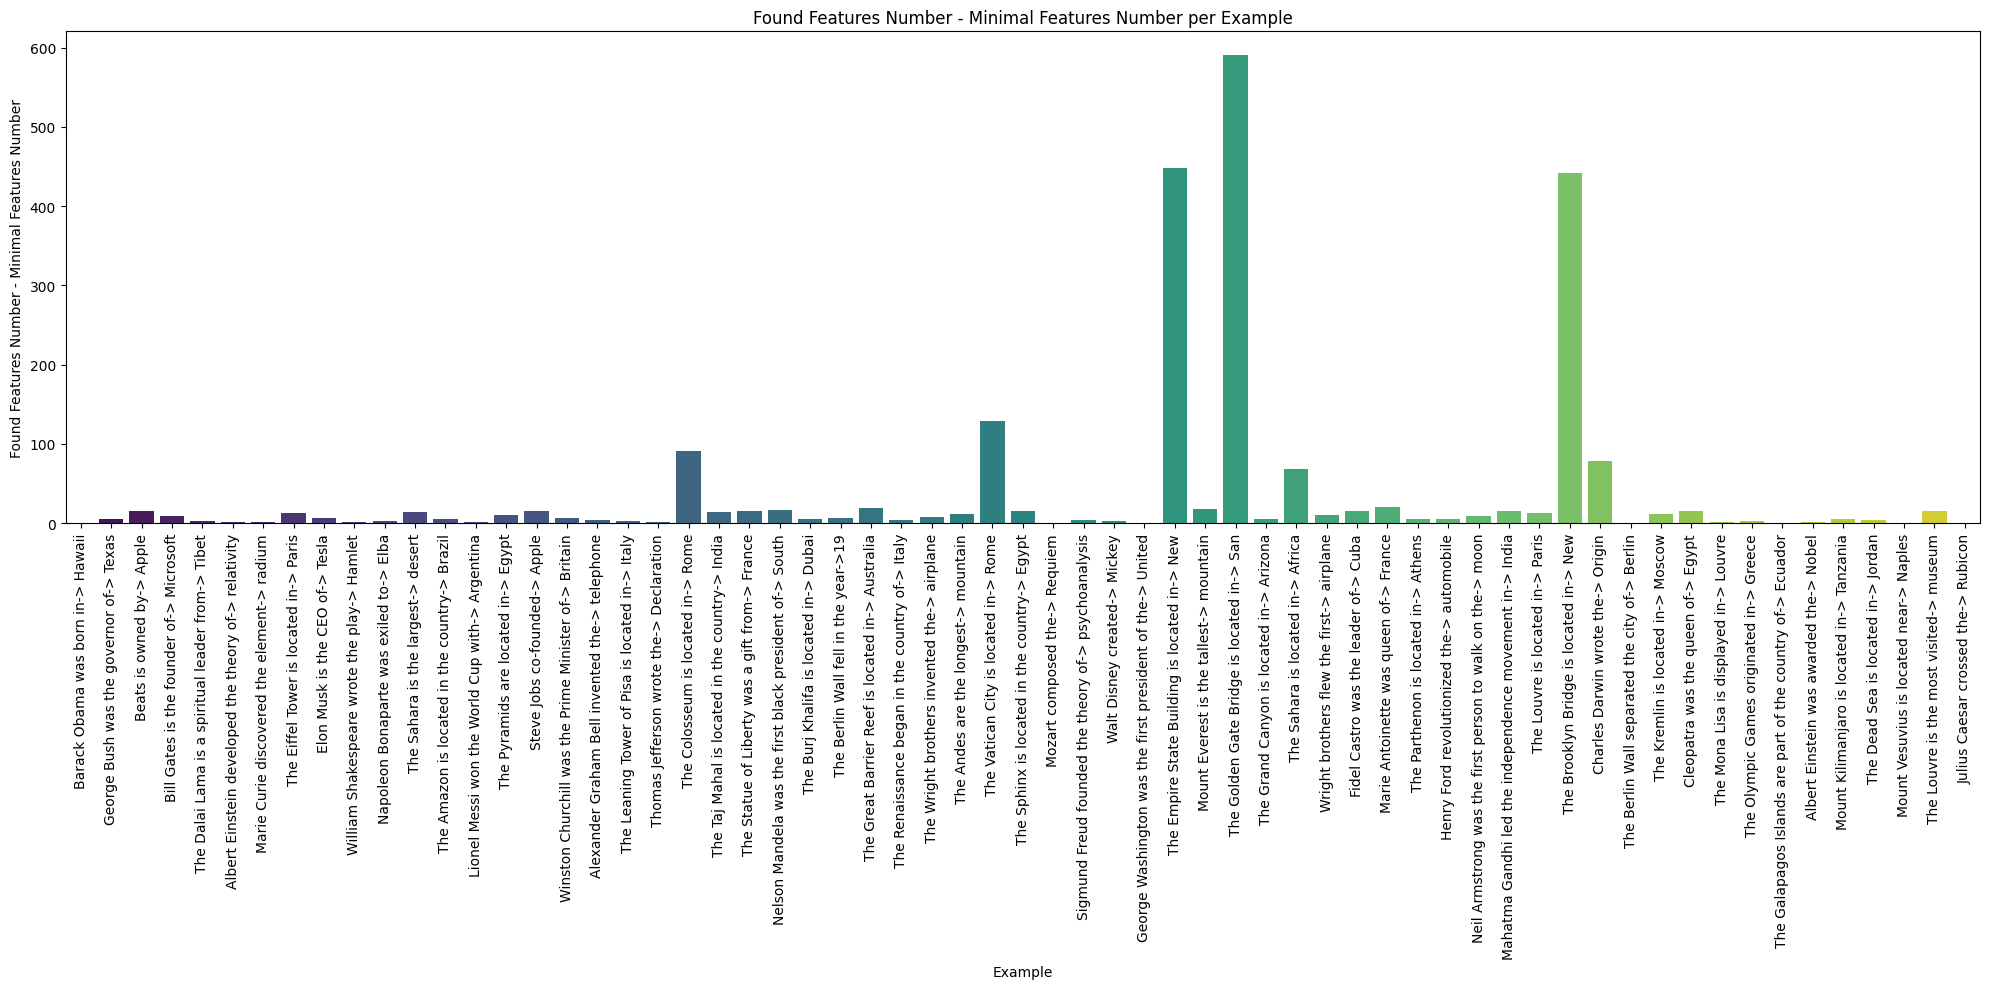

In [8]:
plt.figure(figsize=(20, 10))
sns.barplot(x='example', y='num_found_to_min_diff', data=output_df, palette='viridis')

plt.title('Found Features Number - Minimal Features Number per Example')
plt.ylabel('Found Features Number - Minimal Features Number')
plt.xlabel('Example')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

/tmp/ipykernel_831990/2399960783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='logit_diff', data=output_df, palette='viridis')


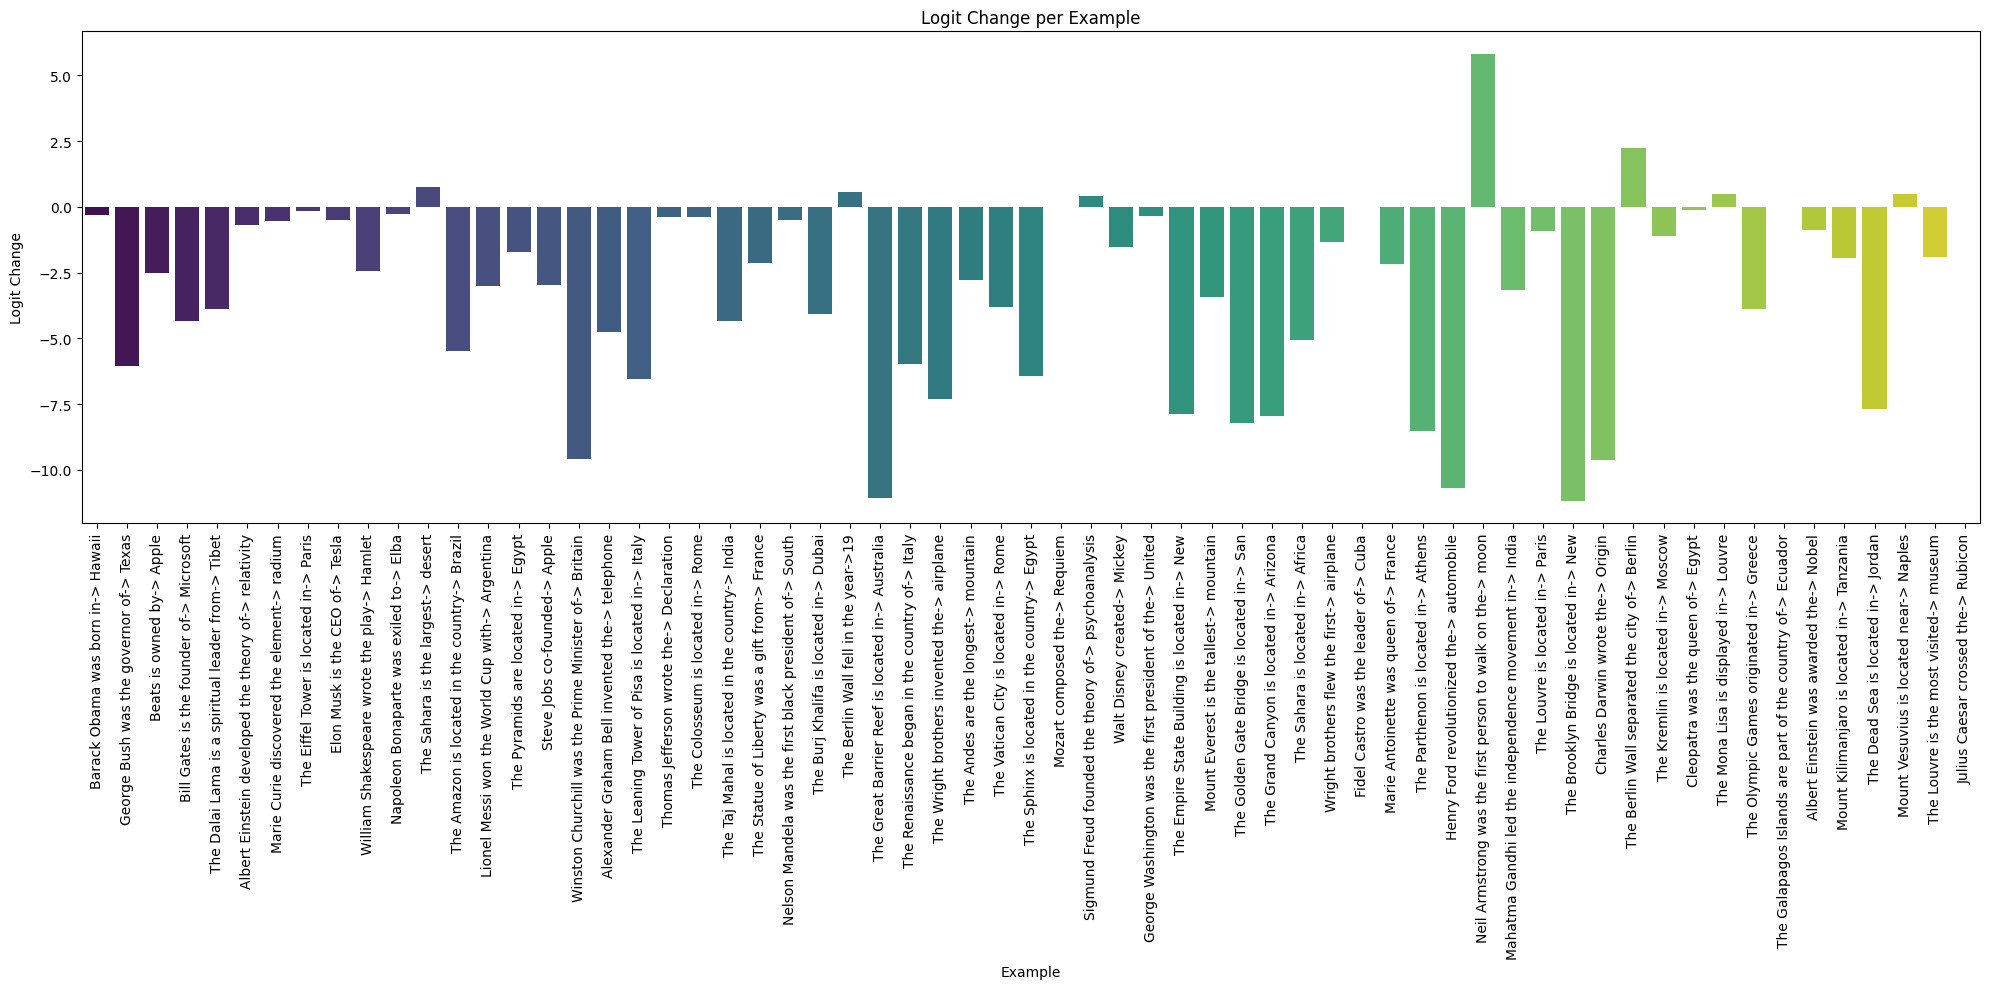

In [5]:
plt.figure(figsize=(20, 10))
sns.barplot(x='example', y='logit_diff', data=output_df, palette='viridis')

plt.title('Logit Change per Example')
plt.ylabel('Logit Change')
plt.xlabel('Example')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [9]:
features_diffs_data = []
for index, row in output_df.iterrows():
    feature_diffs = row['feature_diffs'] 
    for feature, diff in feature_diffs.items():
        features_diffs_data.append({
            'example': row['example'],
            'layer': int(feature[0].split('/')[0].replace("layer_","")),
            'index': feature[1],
            'activation': feature[2],
            'layer_index': f"{feature[0]}/{feature[1]}",
            'diff': diff
        })


features_diff_df = pd.DataFrame(features_diffs_data)
features_diff_df.head()

example  layer  index  activation  \
0        Barack Obama was born in-> Hawaii      6  62465    1.282317   
1  George Bush was the governor of-> Texas     20   6027   11.442189   
2  George Bush was the governor of-> Texas      8  46230    2.594975   
3  George Bush was the governor of-> Texas      7  64391    4.383185   
4  George Bush was the governor of-> Texas      8  15009    2.097821   

                              layer_index      diff  
0  layer_6/width_65k/average_l0_101/62465 -0.500265  
1   layer_20/width_65k/average_l0_88/6027 -0.716677  
2  layer_8/width_65k/average_l0_110/46230  1.110304  
3  layer_7/width_65k/average_l0_115/64391 -2.310377  
4  layer_8/width_65k/average_l0_110/15009  1.649698

/tmp/ipykernel_159273/397034952.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='example', y='diff', data=features_diff_df, palette='viridis')


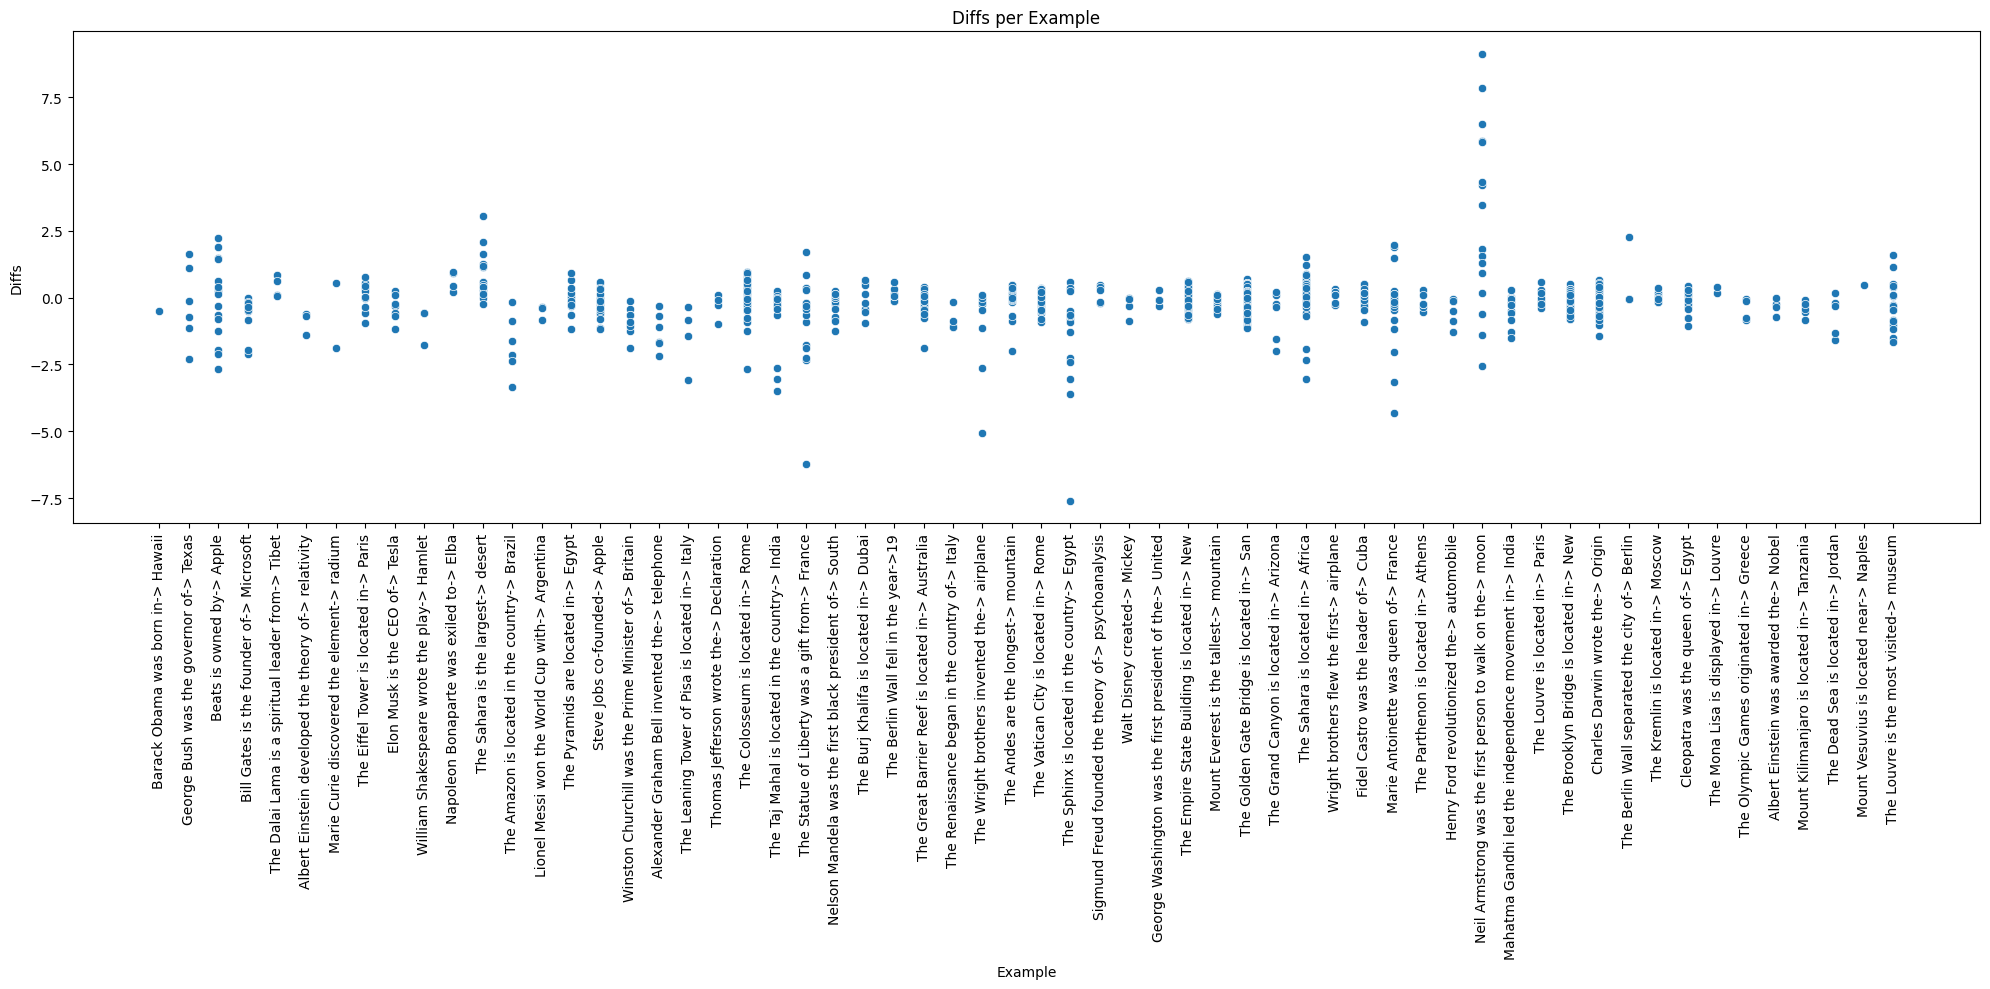

In [10]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='example', y='diff', data=features_diff_df, palette='viridis')

plt.title('Diffs per Example')
plt.ylabel('Diffs')
plt.xlabel('Example')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

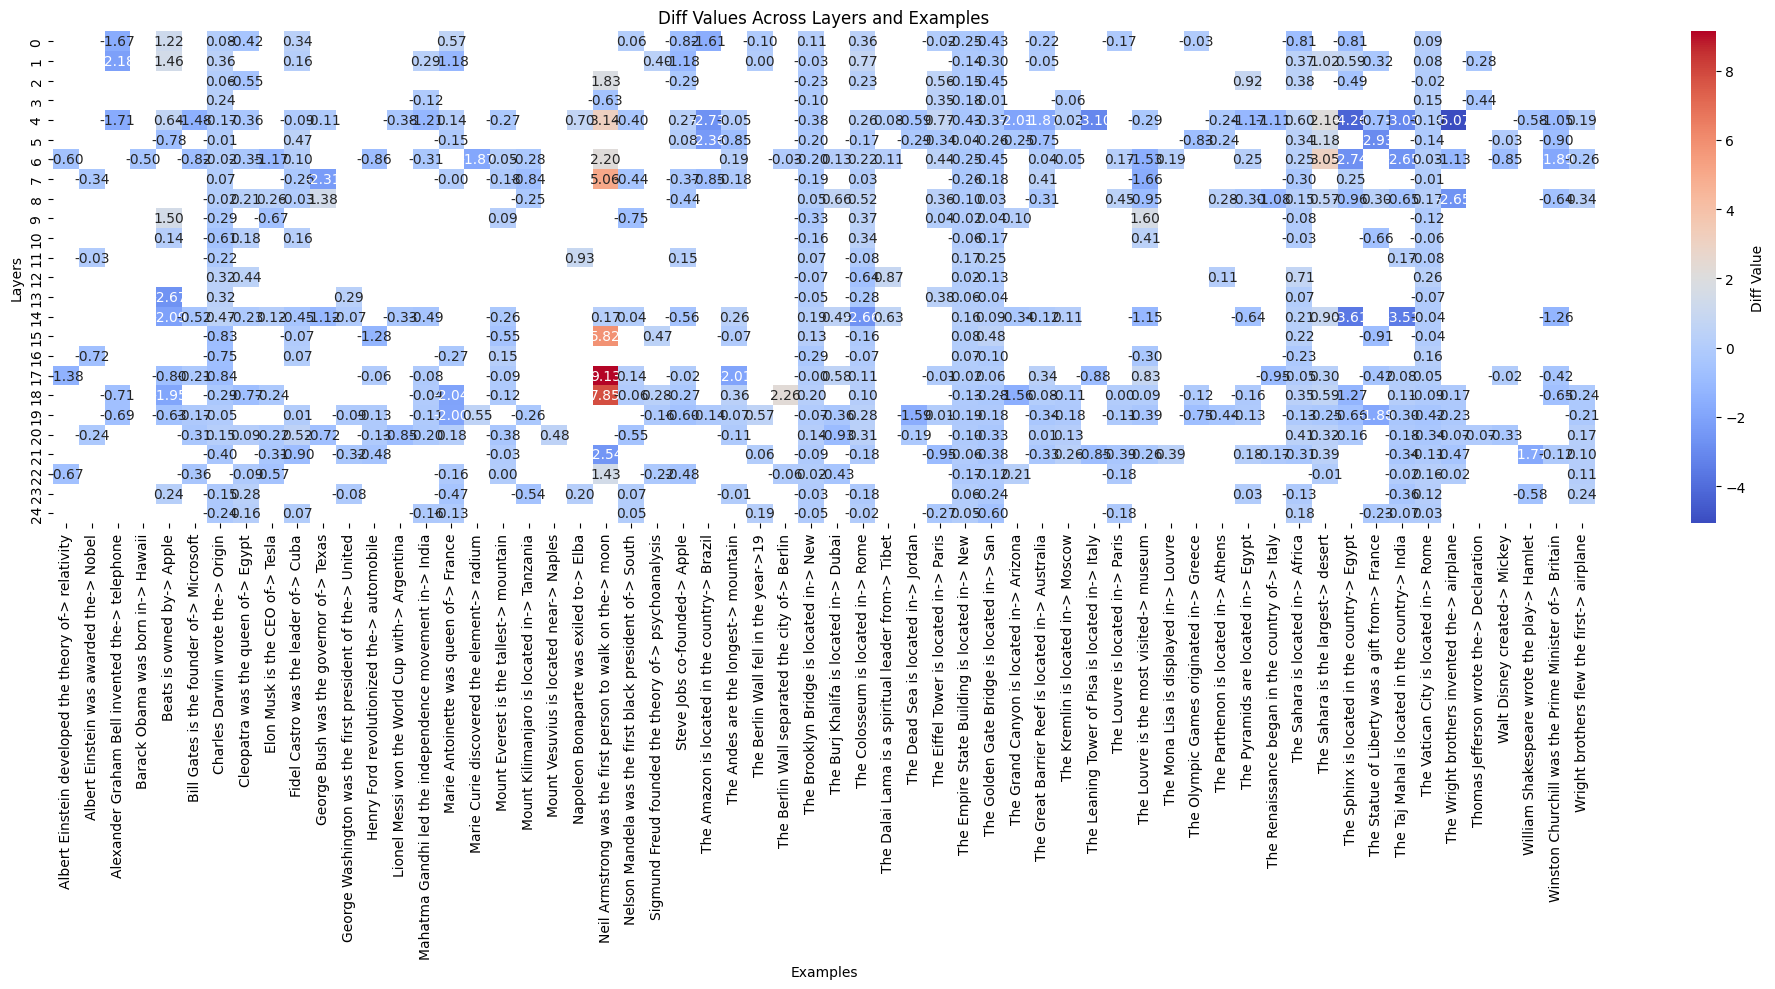

In [8]:
pivot_matrix = features_diff_df.pivot_table(index='layer', columns='example', values='diff', aggfunc='mean')

plt.figure(figsize=(20, 10))
sns.heatmap(pivot_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Diff Value'})
plt.title('Diff Values Across Layers and Examples')
plt.ylabel('Layers')
plt.xlabel('Examples')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [34]:
min_features_data = []
found_features_data = []
for index, row in output_df.iterrows():
    min_features = row['min_features'] 
    found_features = row['found_features']
    for entry_features, features_data in [(min_features, min_features_data), (found_features, found_features_data)]:
        for feature in entry_features:
            features_data.append({
                'example': row['example'],
                'object': row['object'],
                'subject': row['subject'],
                'layer': int(feature[0].split('/')[0].replace("layer_","")),
                'index': feature[1],
                'activation': feature[2],
                'layer_index': f"{feature[0]}/{feature[1]}"
            })

min_features_df = pd.DataFrame(min_features_data)
found_features_df = pd.DataFrame(found_features_data)

print(min_features_df.head())
print(found_features_df.head())


                                             example      object  \
0                  Barack Obama was born in-> Hawaii      Hawaii   
1            George Bush was the governor of-> Texas       Texas   
2                          Beats is owned by-> Apple       Apple   
3           Bill Gates is the founder of-> Microsoft   Microsoft   
4  The Dalai Lama is a spiritual leader from-> Tibet       Tibet   

        subject  layer  index  activation  \
0  Barack Obama      6  62465    1.282317   
1   George Bush      7  64391    4.383185   
2         Beats      5  34531    6.172657   
3    Bill Gates      4  29067   14.627275   
4    Dalai Lama      4    435    5.269289   

                              layer_index  
0  layer_6/width_65k/average_l0_101/62465  
1  layer_7/width_65k/average_l0_115/64391  
2   layer_5/width_65k/average_l0_86/34531  
3   layer_4/width_65k/average_l0_66/29067  
4     layer_4/width_65k/average_l0_66/435  
                                   example   object     

min features


/tmp/ipykernel_831990/2636667447.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='example', y='activation', data=features_df, palette='viridis')


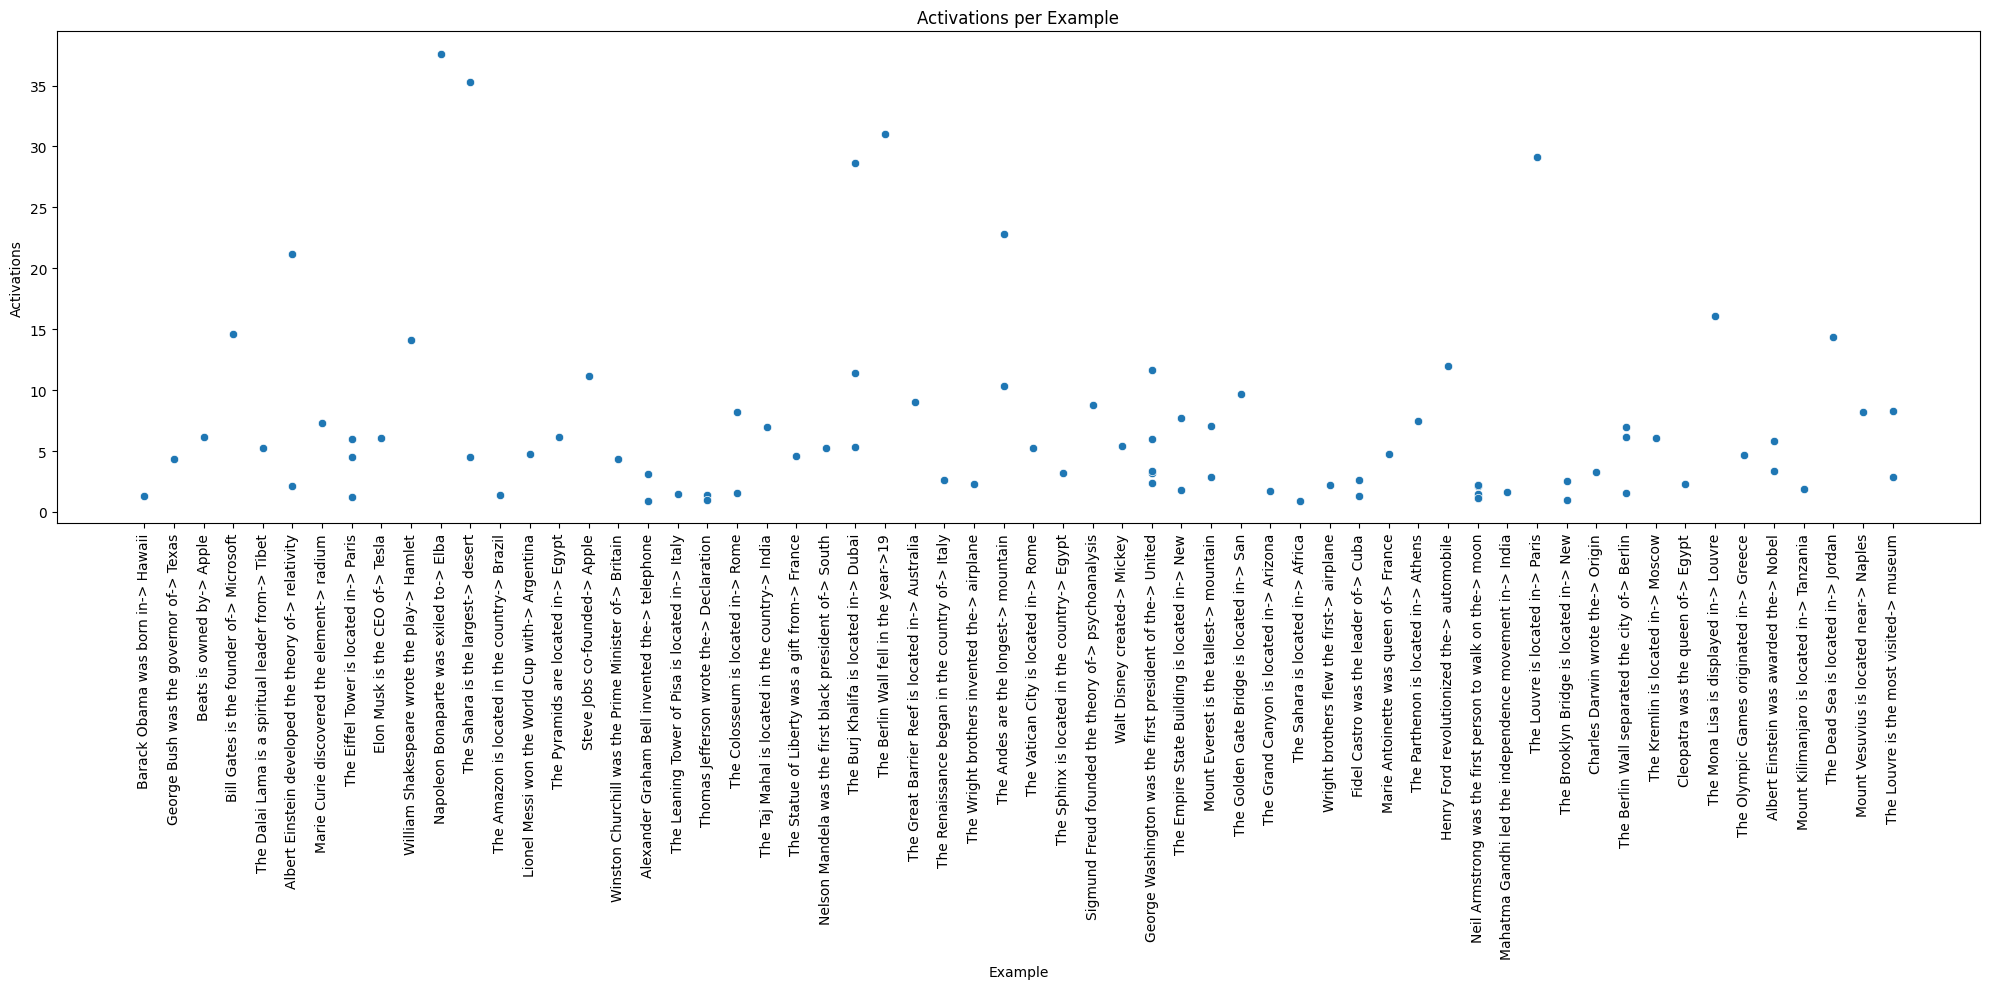

found features


/tmp/ipykernel_831990/2636667447.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='example', y='activation', data=features_df, palette='viridis')


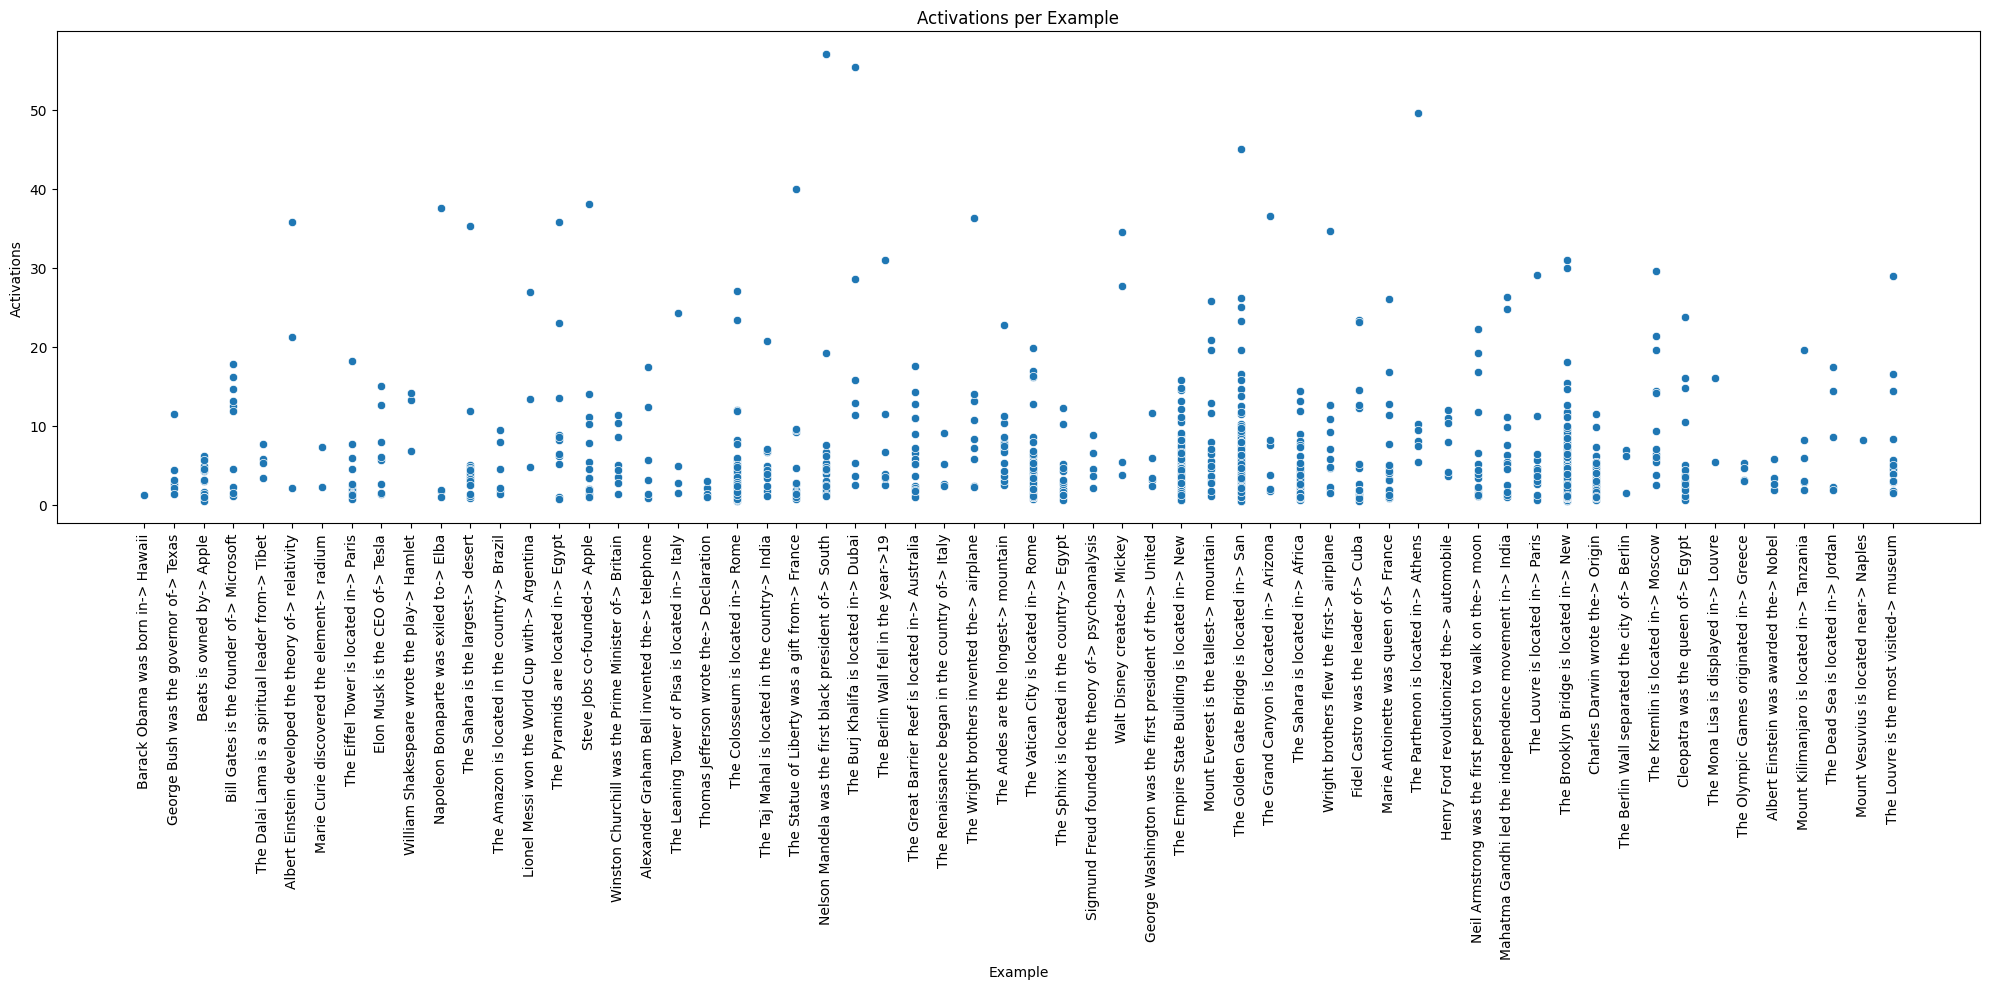

In [10]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x='example', y='activation', data=features_df, palette='viridis')

    plt.title('Activations per Example')
    plt.ylabel('Activations')
    plt.xlabel('Example')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_159273/760564084.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='example', y='layer', data=features_df, palette='viridis')


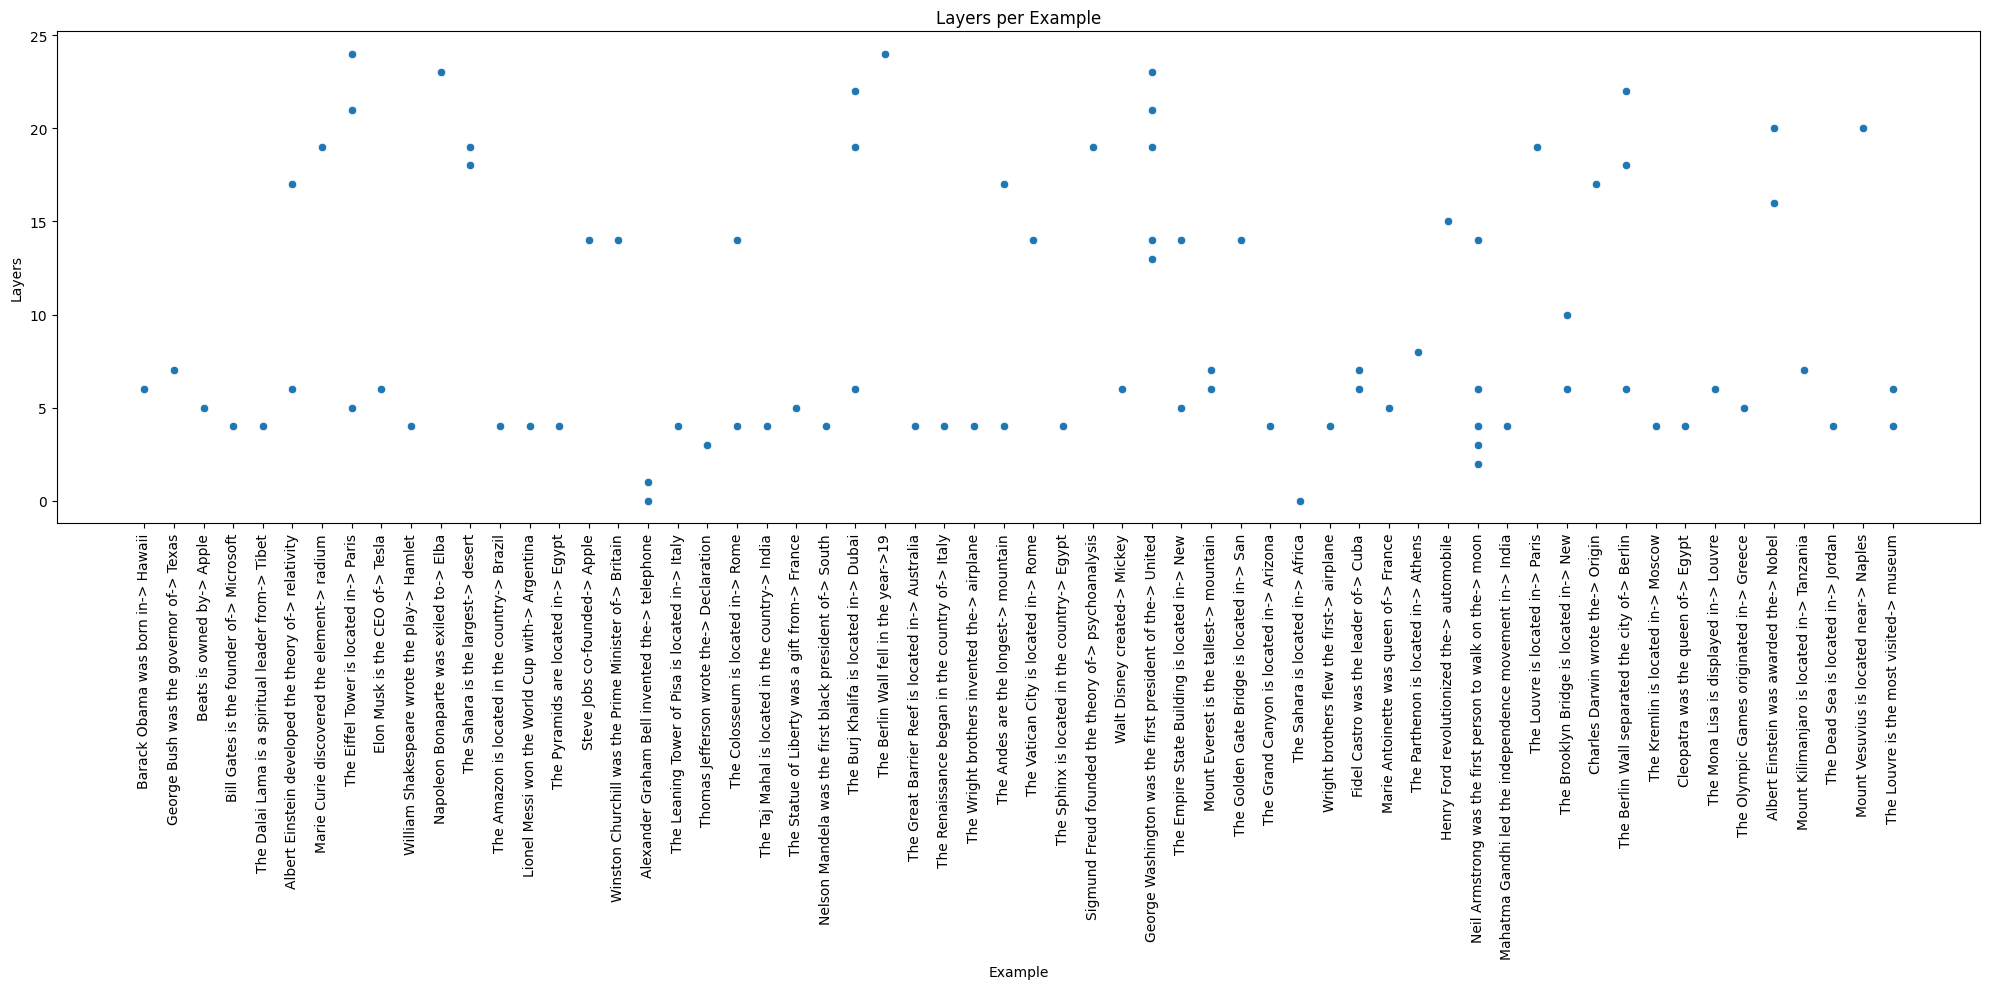

found features


/tmp/ipykernel_159273/760564084.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='example', y='layer', data=features_df, palette='viridis')


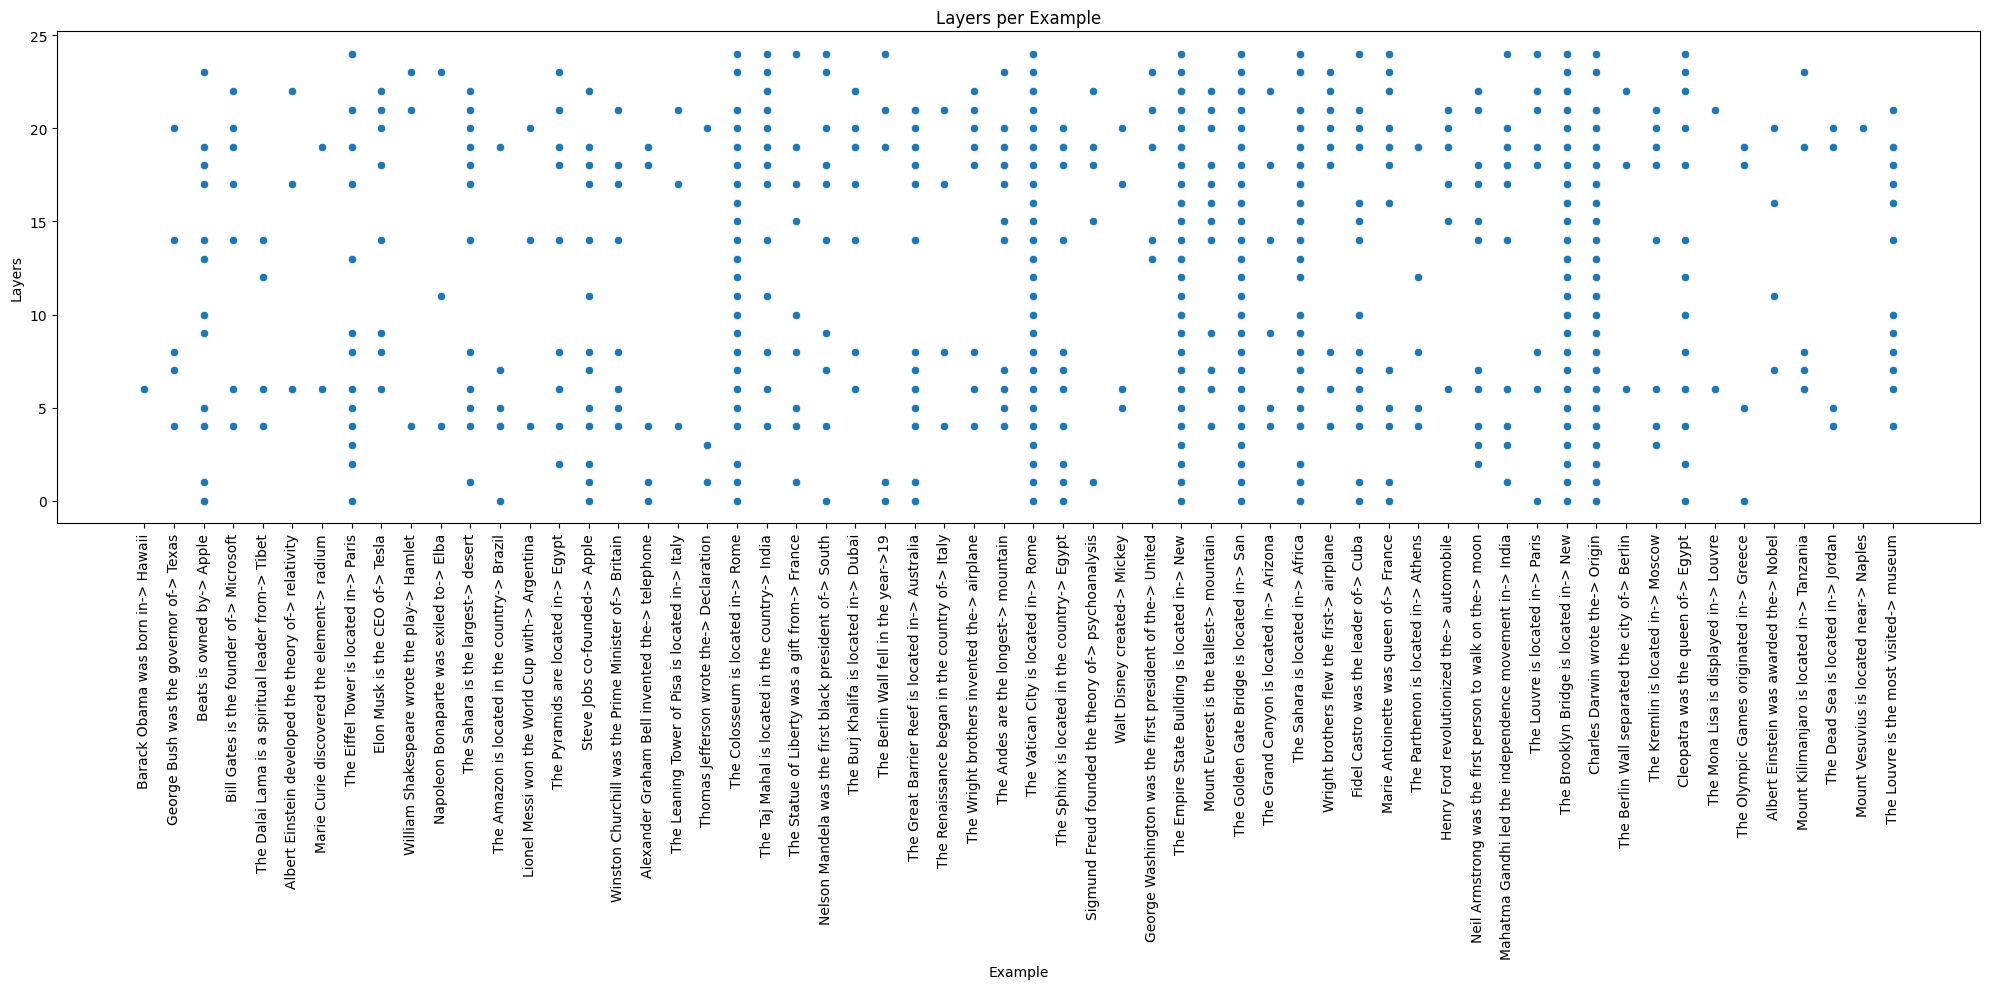

In [12]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x='example', y='layer', data=features_df, palette='viridis')

    plt.title('Layers per Example')
    plt.ylabel('Layers')
    plt.xlabel('Example')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_159273/4062811354.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='activation', y='layer', data=features_df, palette='viridis')


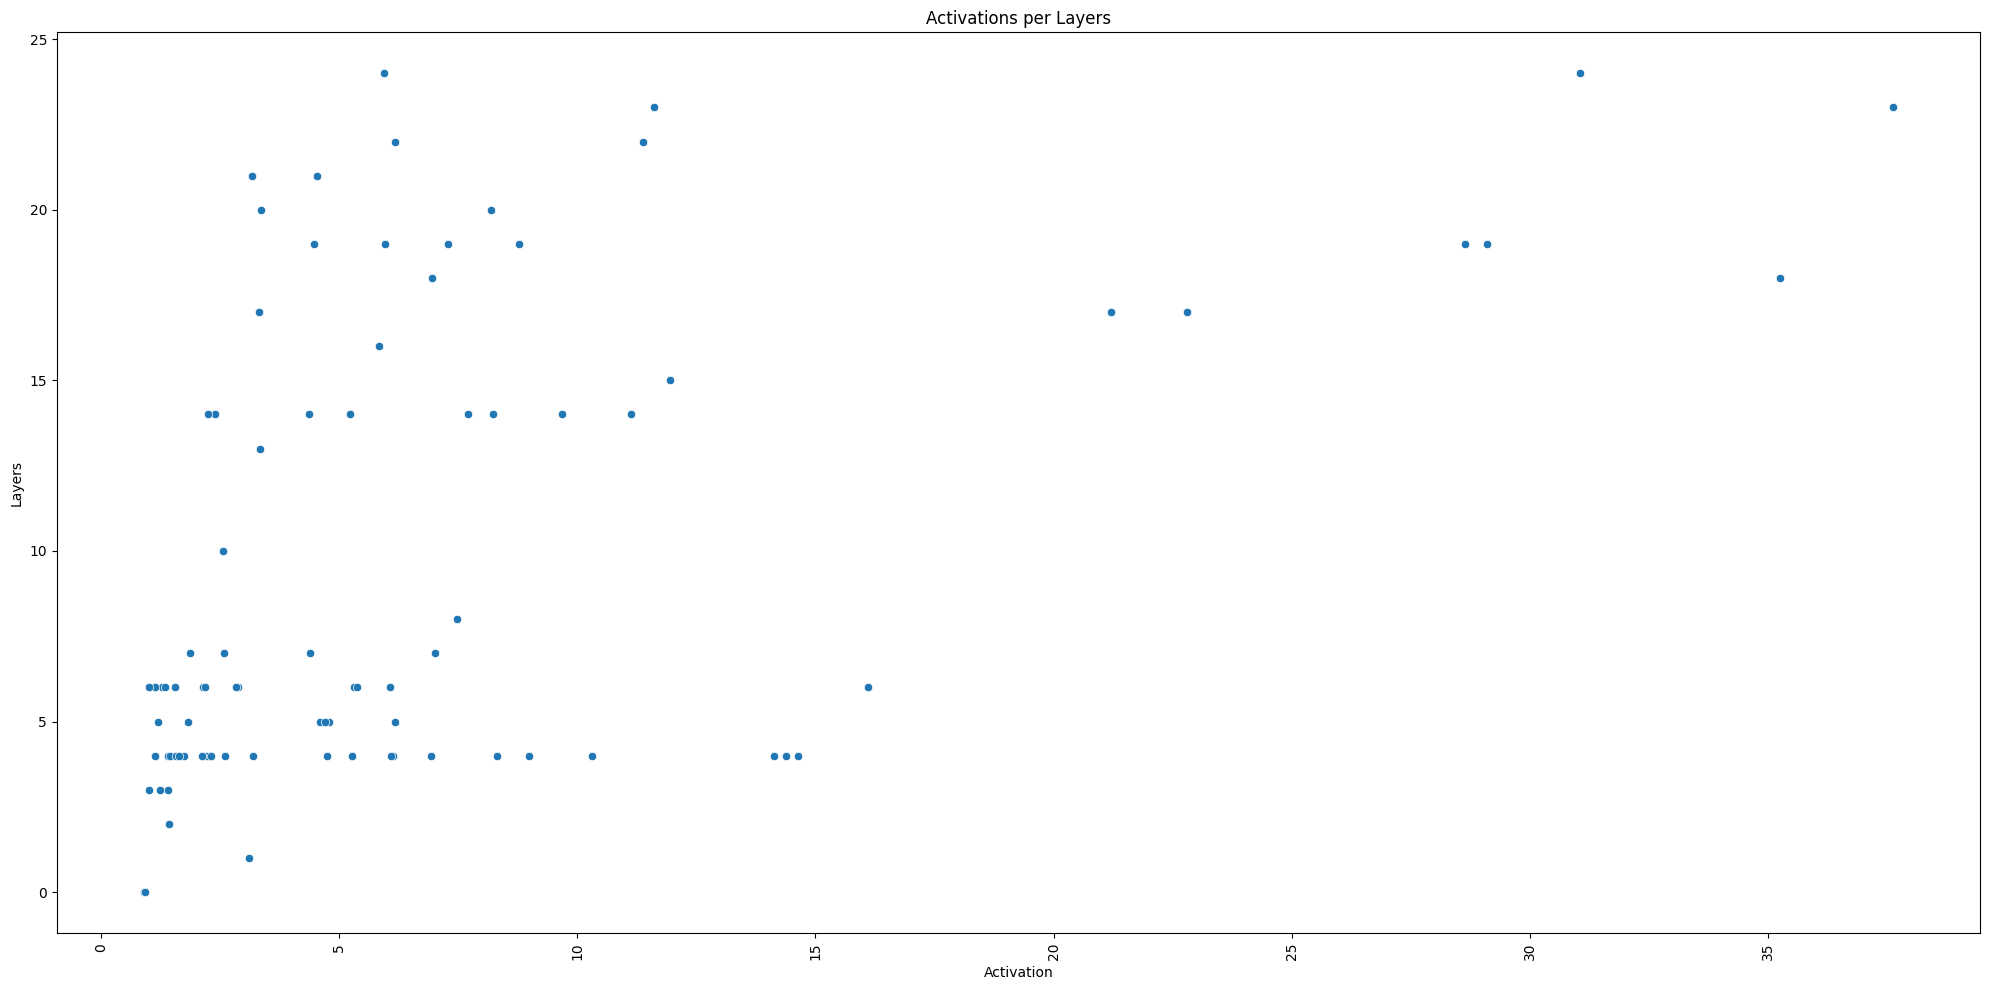

found features


/tmp/ipykernel_159273/4062811354.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='activation', y='layer', data=features_df, palette='viridis')


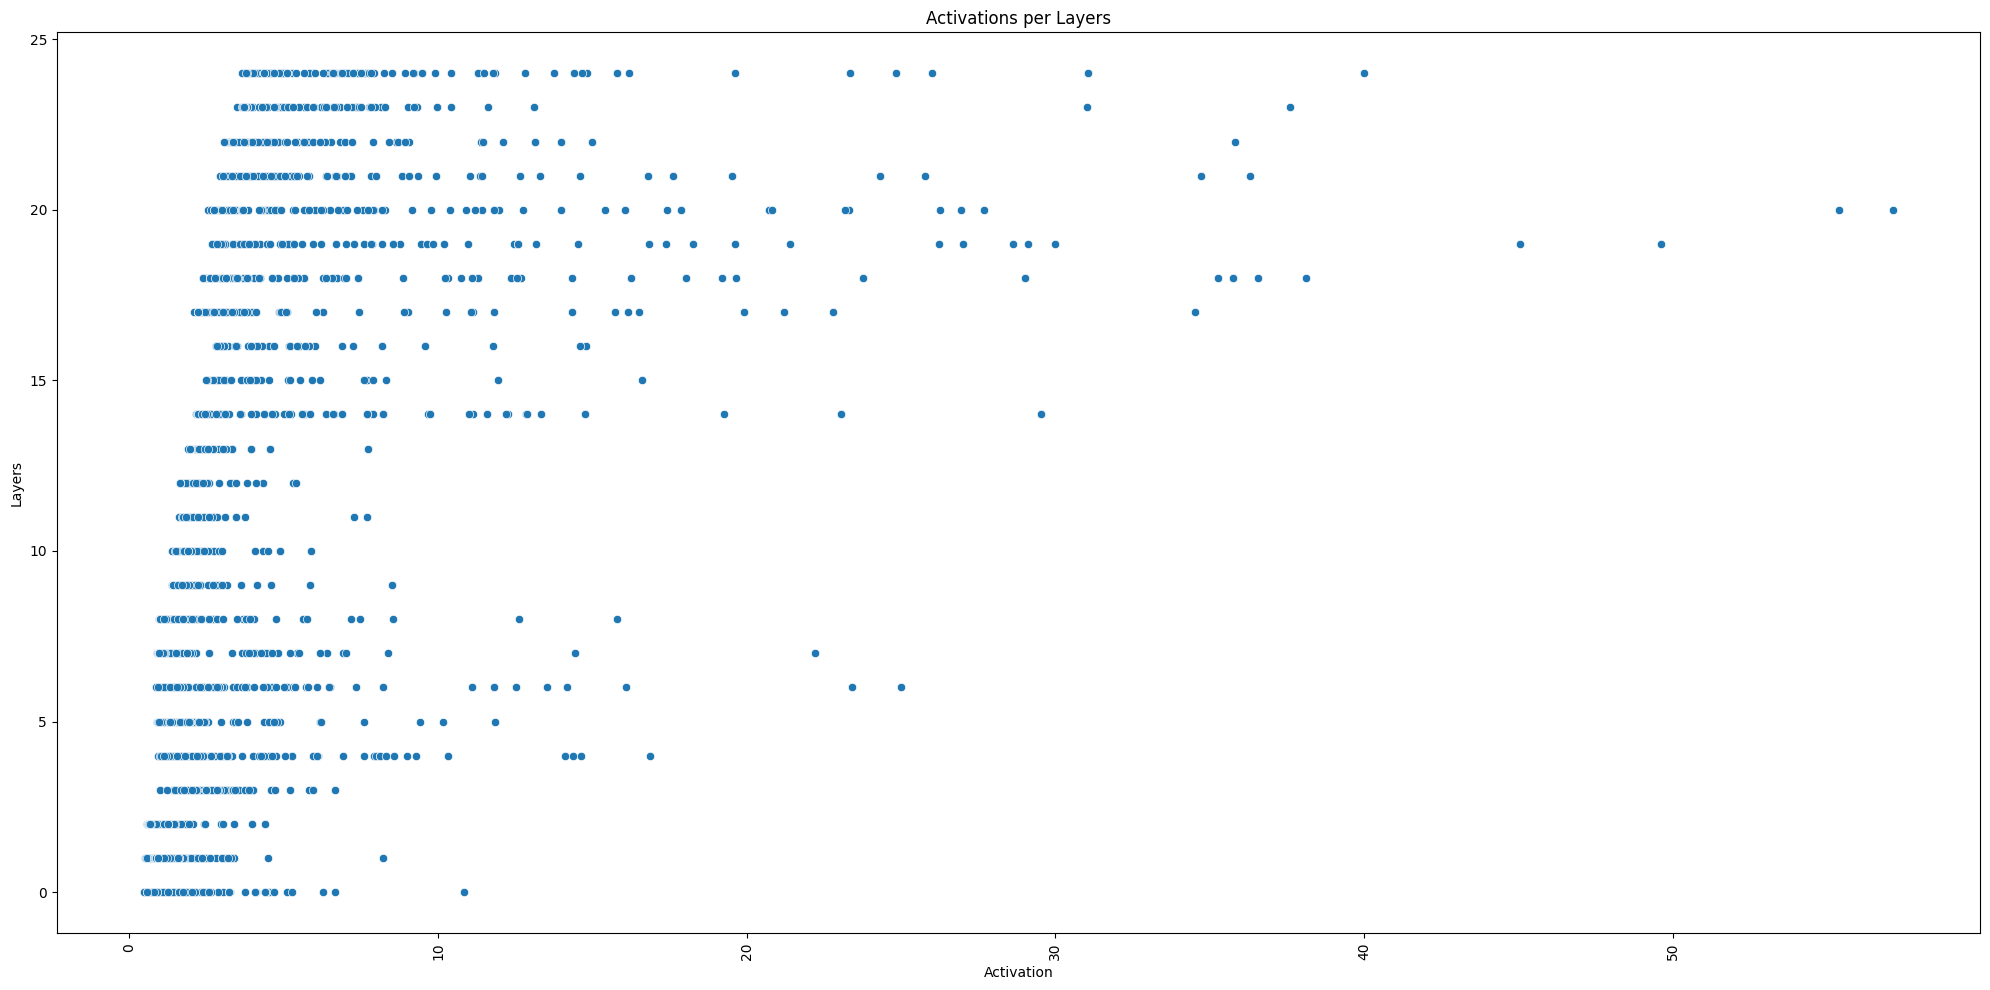

In [13]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x='activation', y='layer', data=features_df, palette='viridis')

    plt.title('Activations per Layers')
    plt.ylabel('Layers')
    plt.xlabel('Activation')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


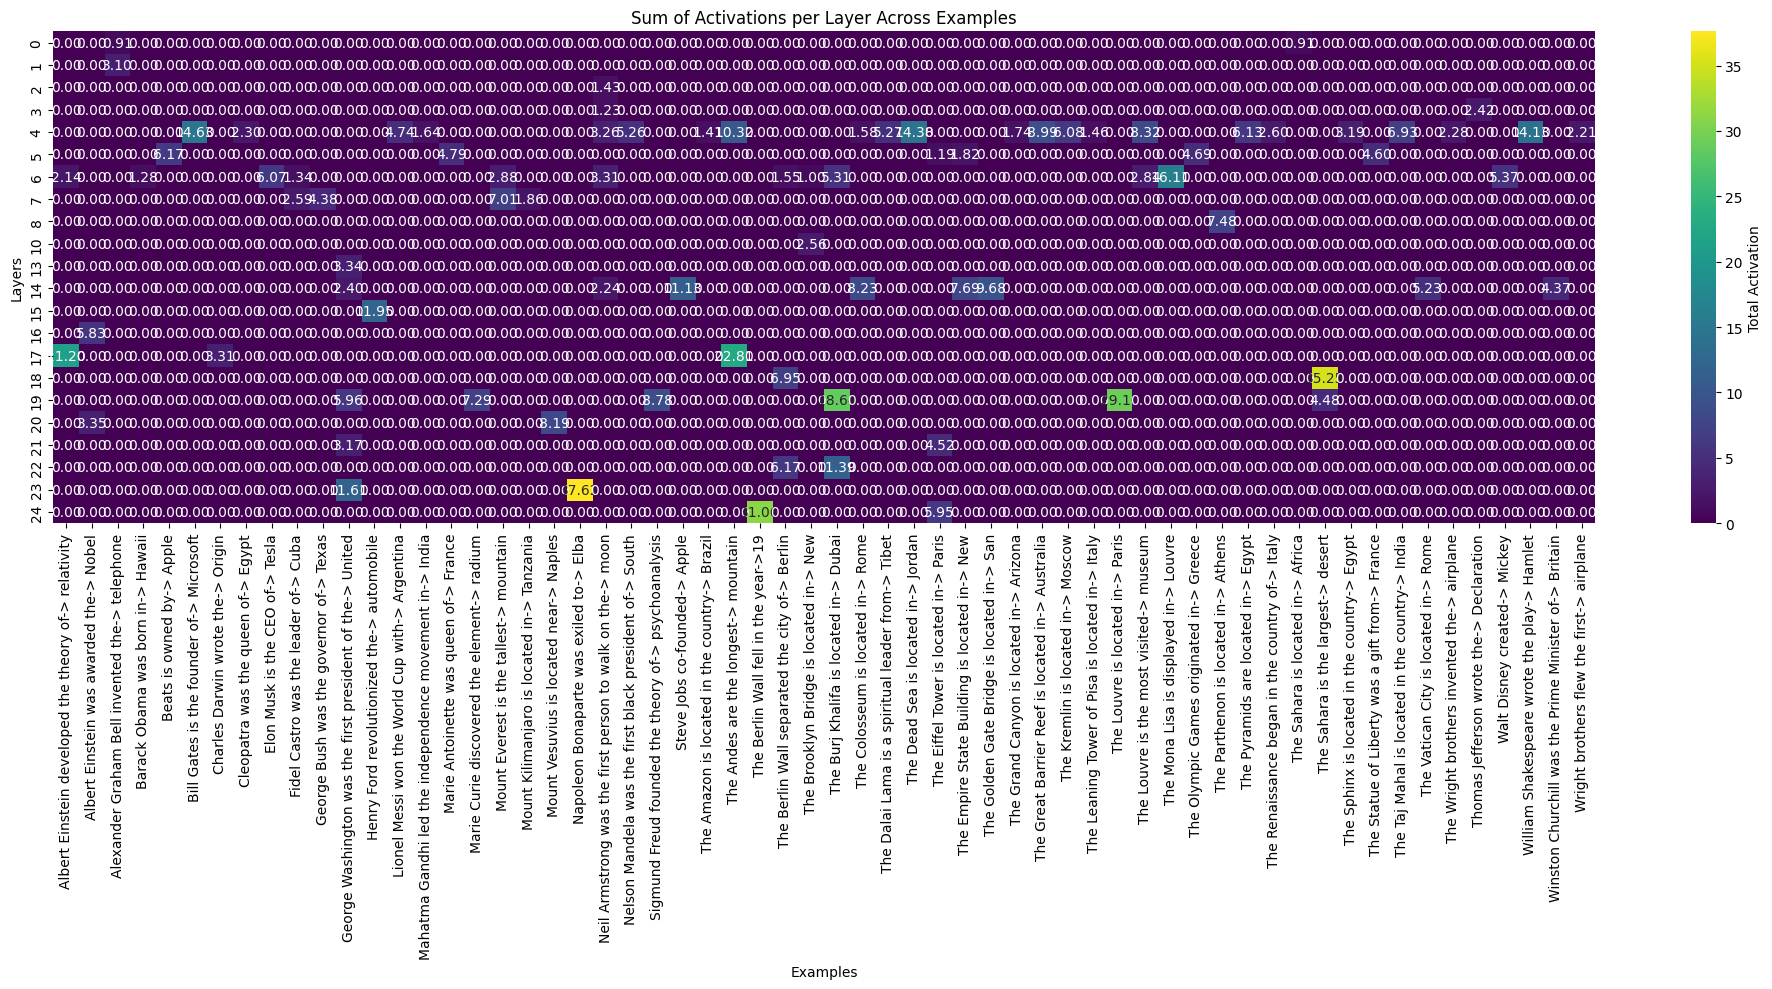

/tmp/ipykernel_831990/3919970492.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_activation.index, y=average_activation.values, palette='viridis')


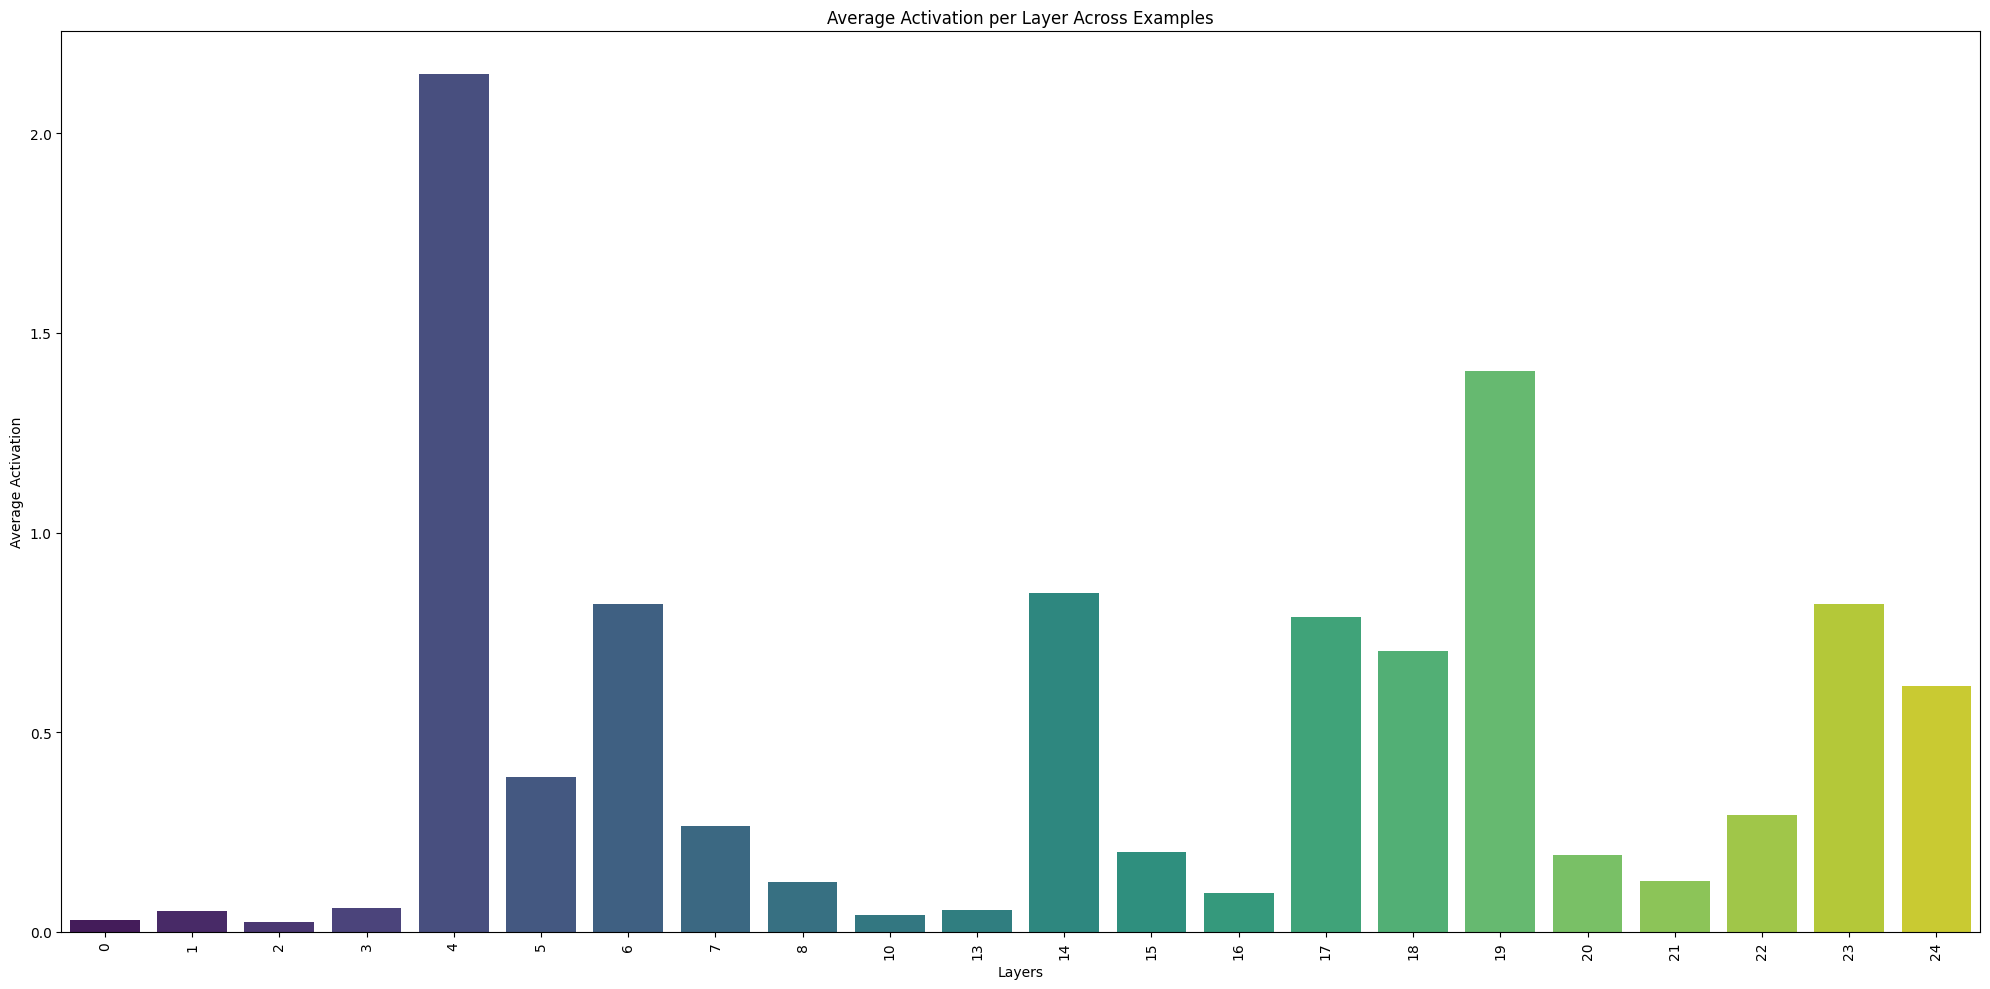

found features


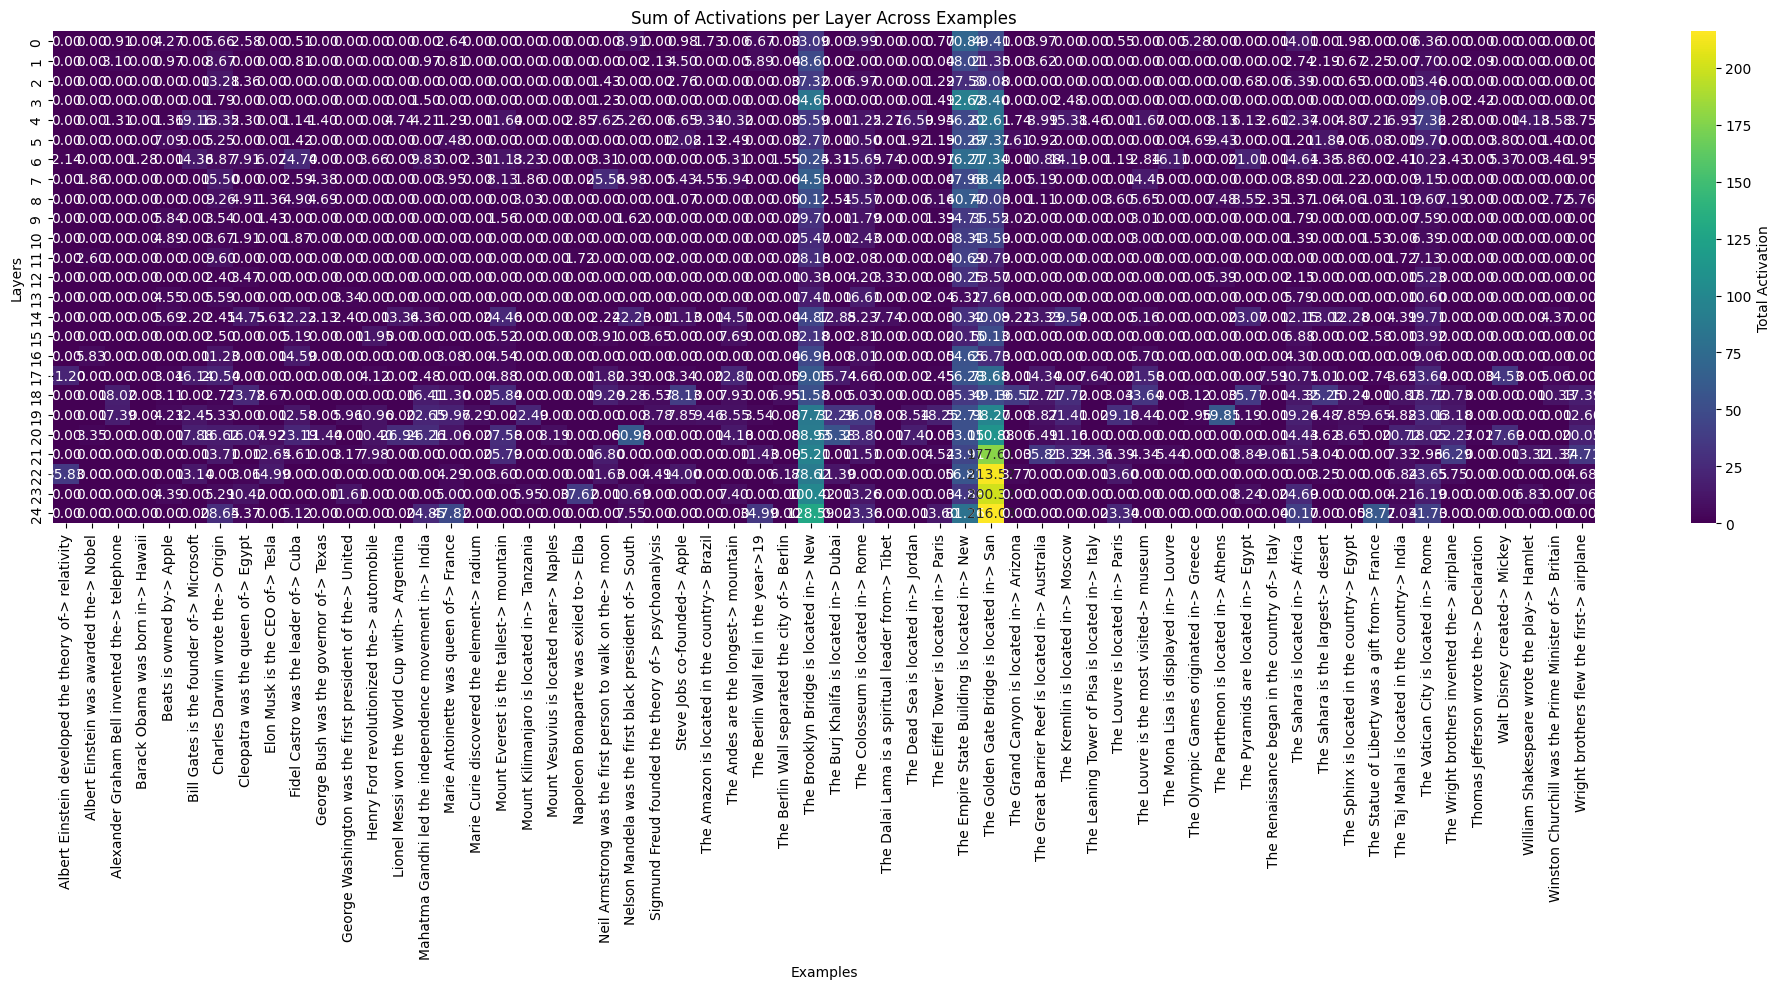

/tmp/ipykernel_831990/3919970492.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_activation.index, y=average_activation.values, palette='viridis')


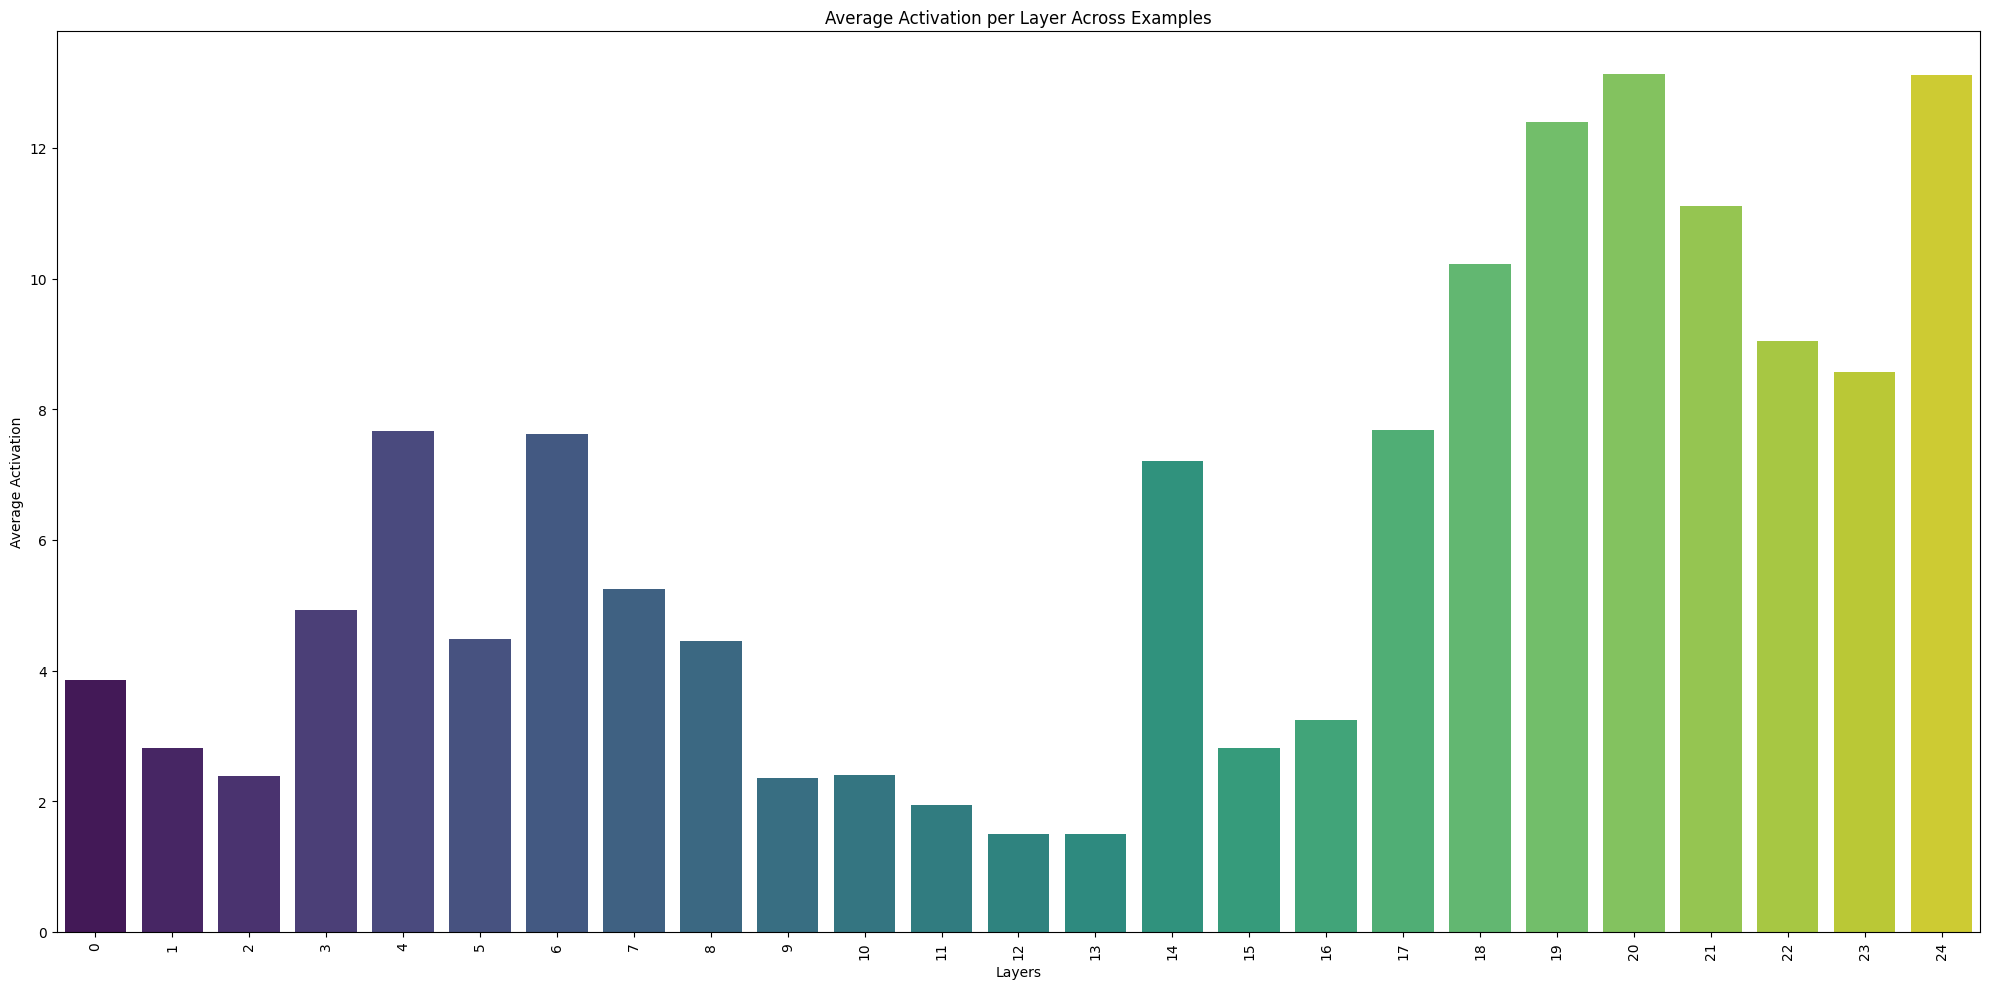

In [13]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    activation_matrix = features_df.pivot_table(
            index='layer', 
            columns='example', 
            values='activation', 
            aggfunc='sum', 
            fill_value=0
        )
    plt.figure(figsize=(20, 10))
    sns.heatmap(activation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Total Activation'})
    plt.title('Sum of Activations per Layer Across Examples')
    plt.ylabel('Layers')
    plt.xlabel('Examples')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    average_activation = activation_matrix.mean(axis=1)
    
    plt.figure(figsize=(20, 10))
    sns.barplot(x=average_activation.index, y=average_activation.values, palette='viridis')

    plt.title('Average Activation per Layer Across Examples')
    plt.ylabel('Average Activation')
    plt.xlabel('Layers')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


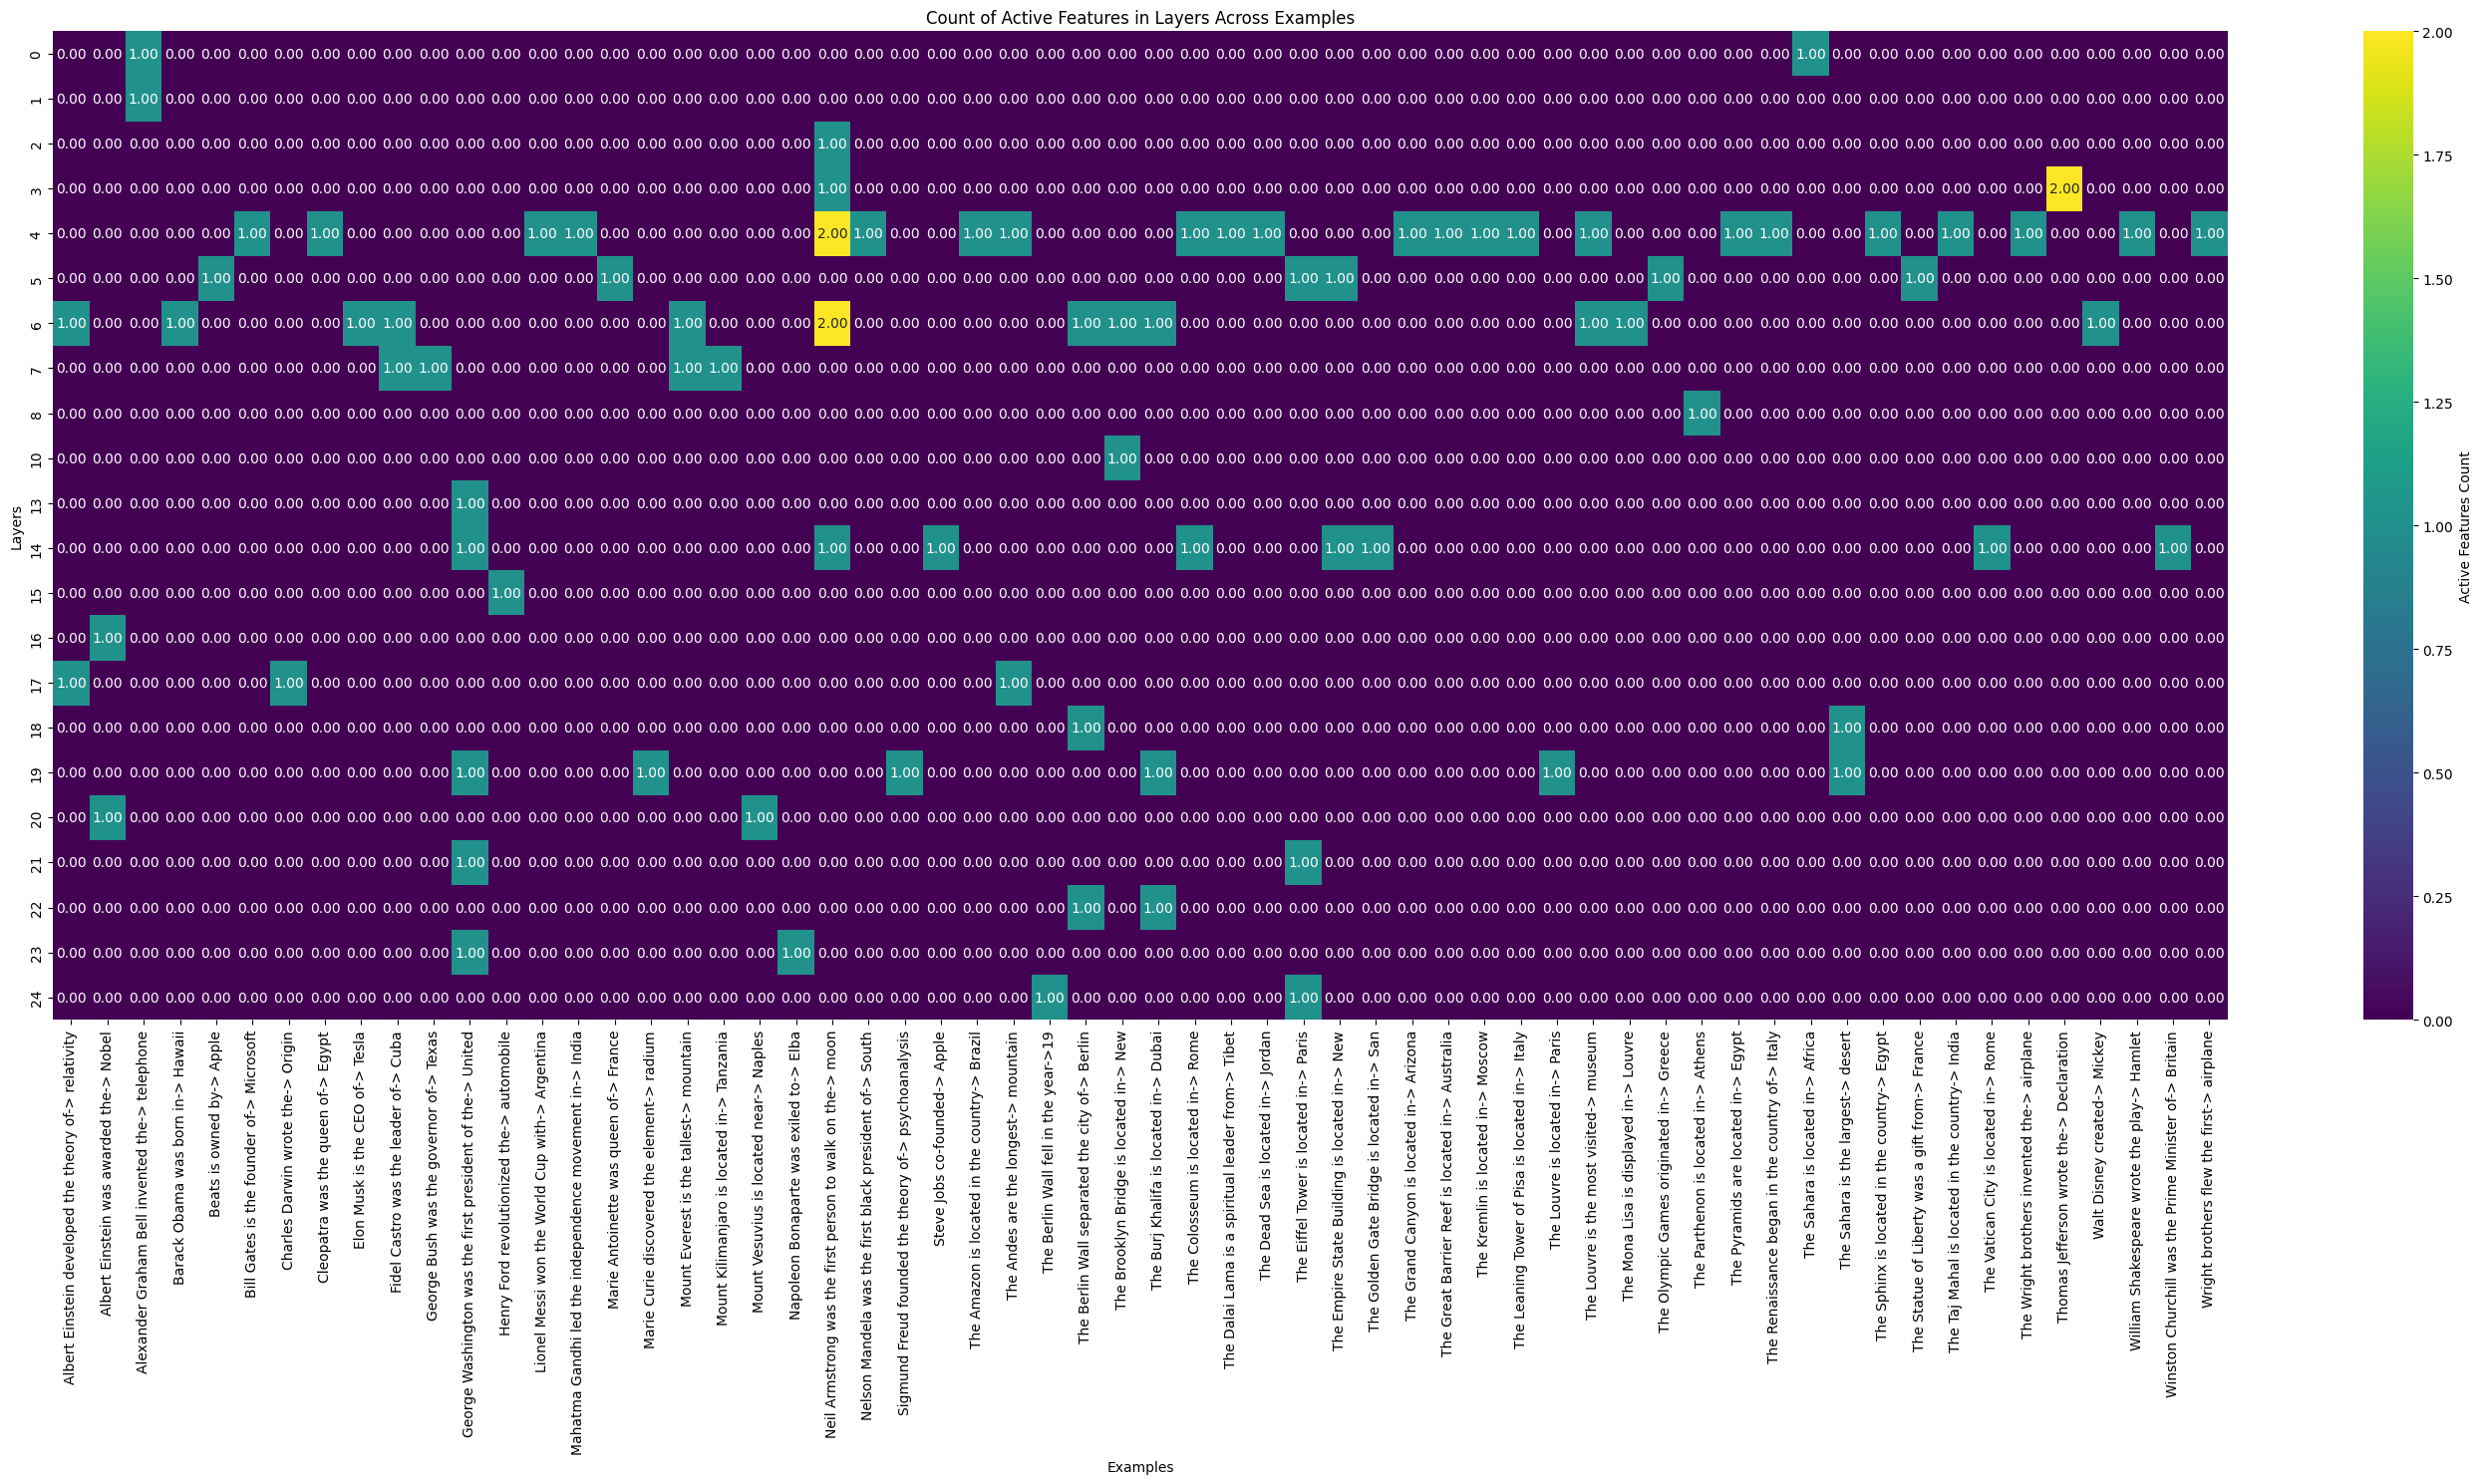

/tmp/ipykernel_831990/1543668067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_count.index, y=average_count.values, palette='viridis')


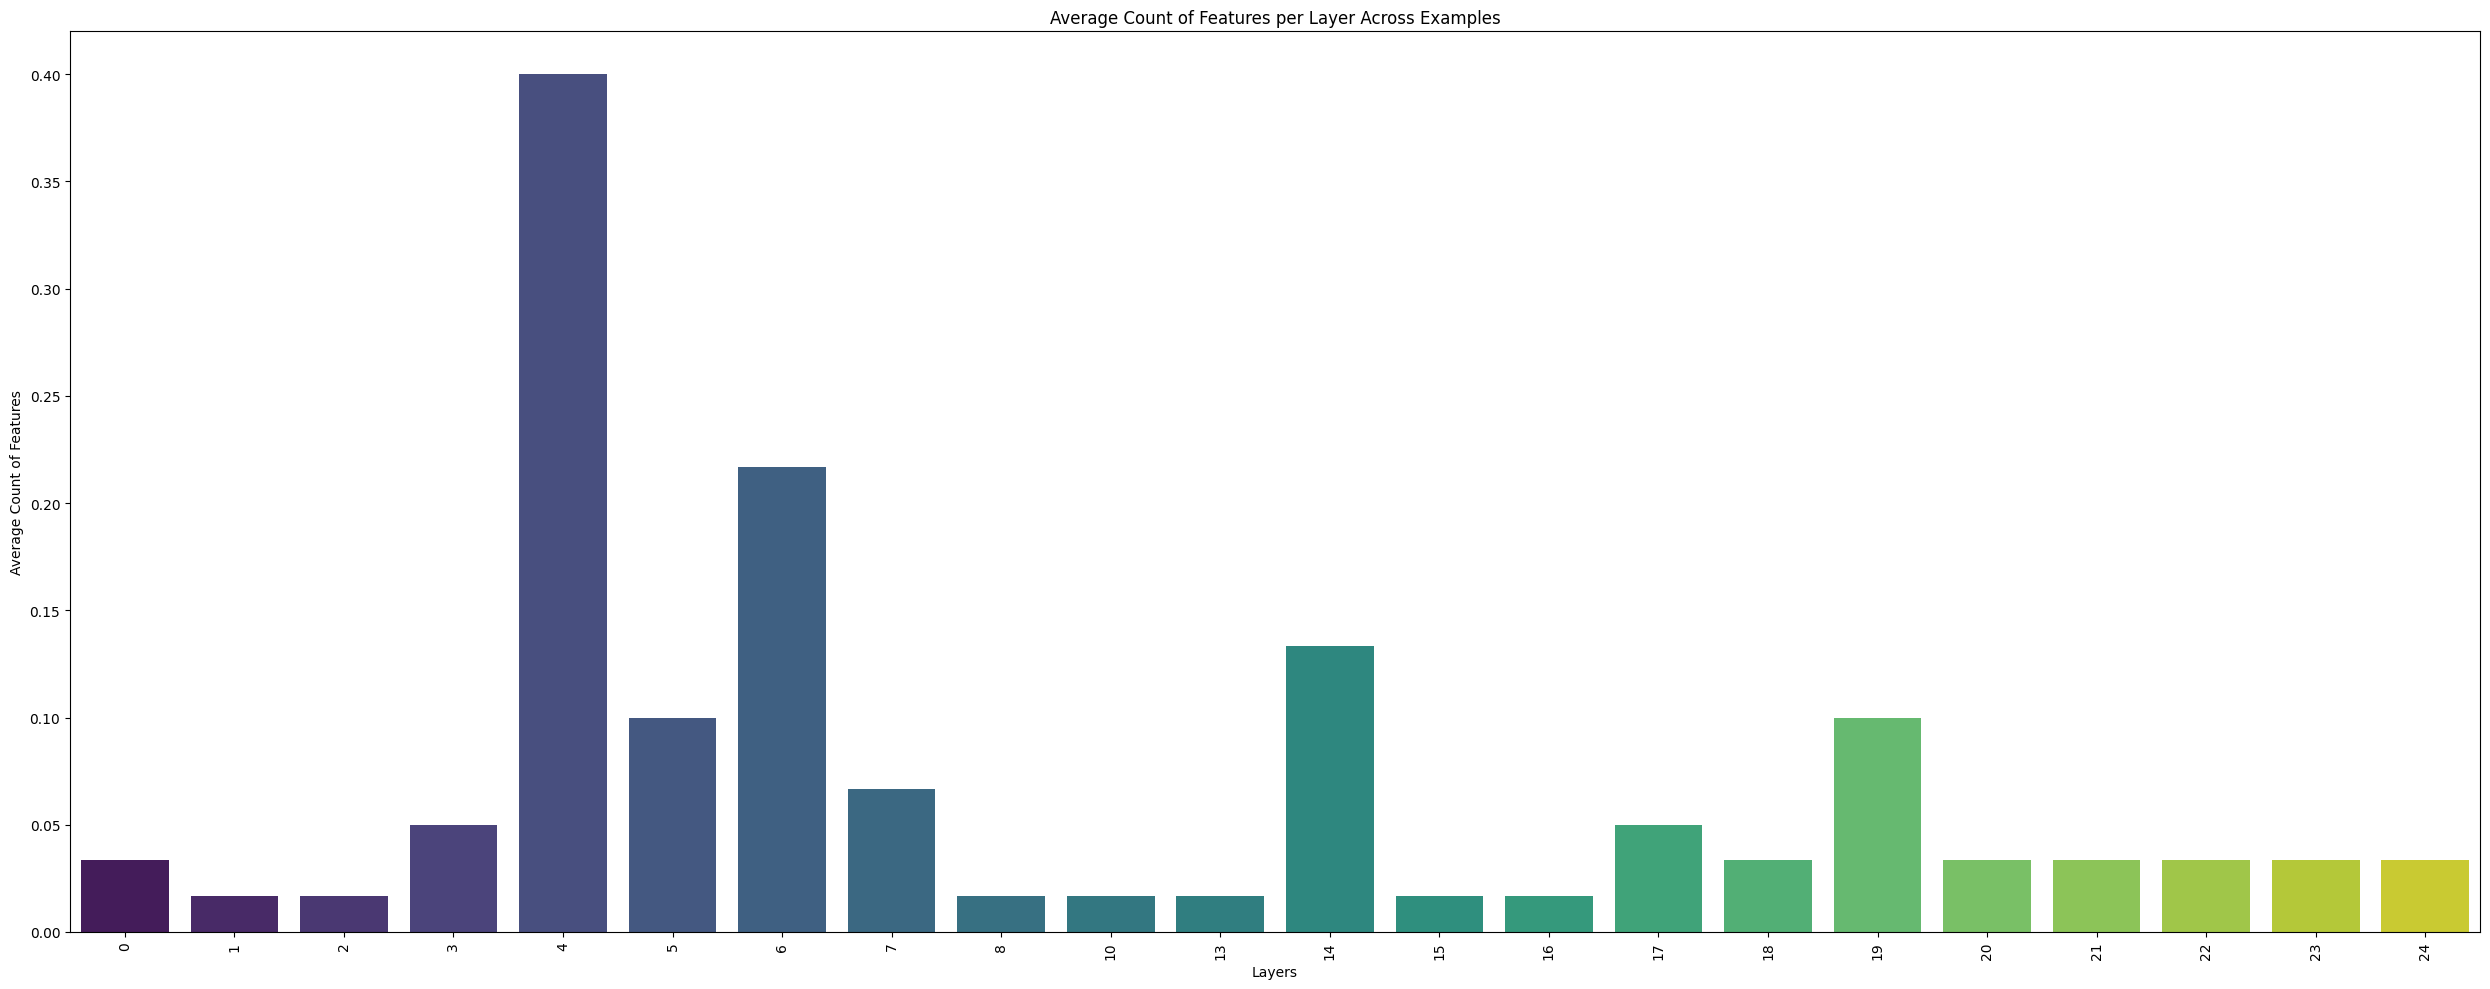

found features


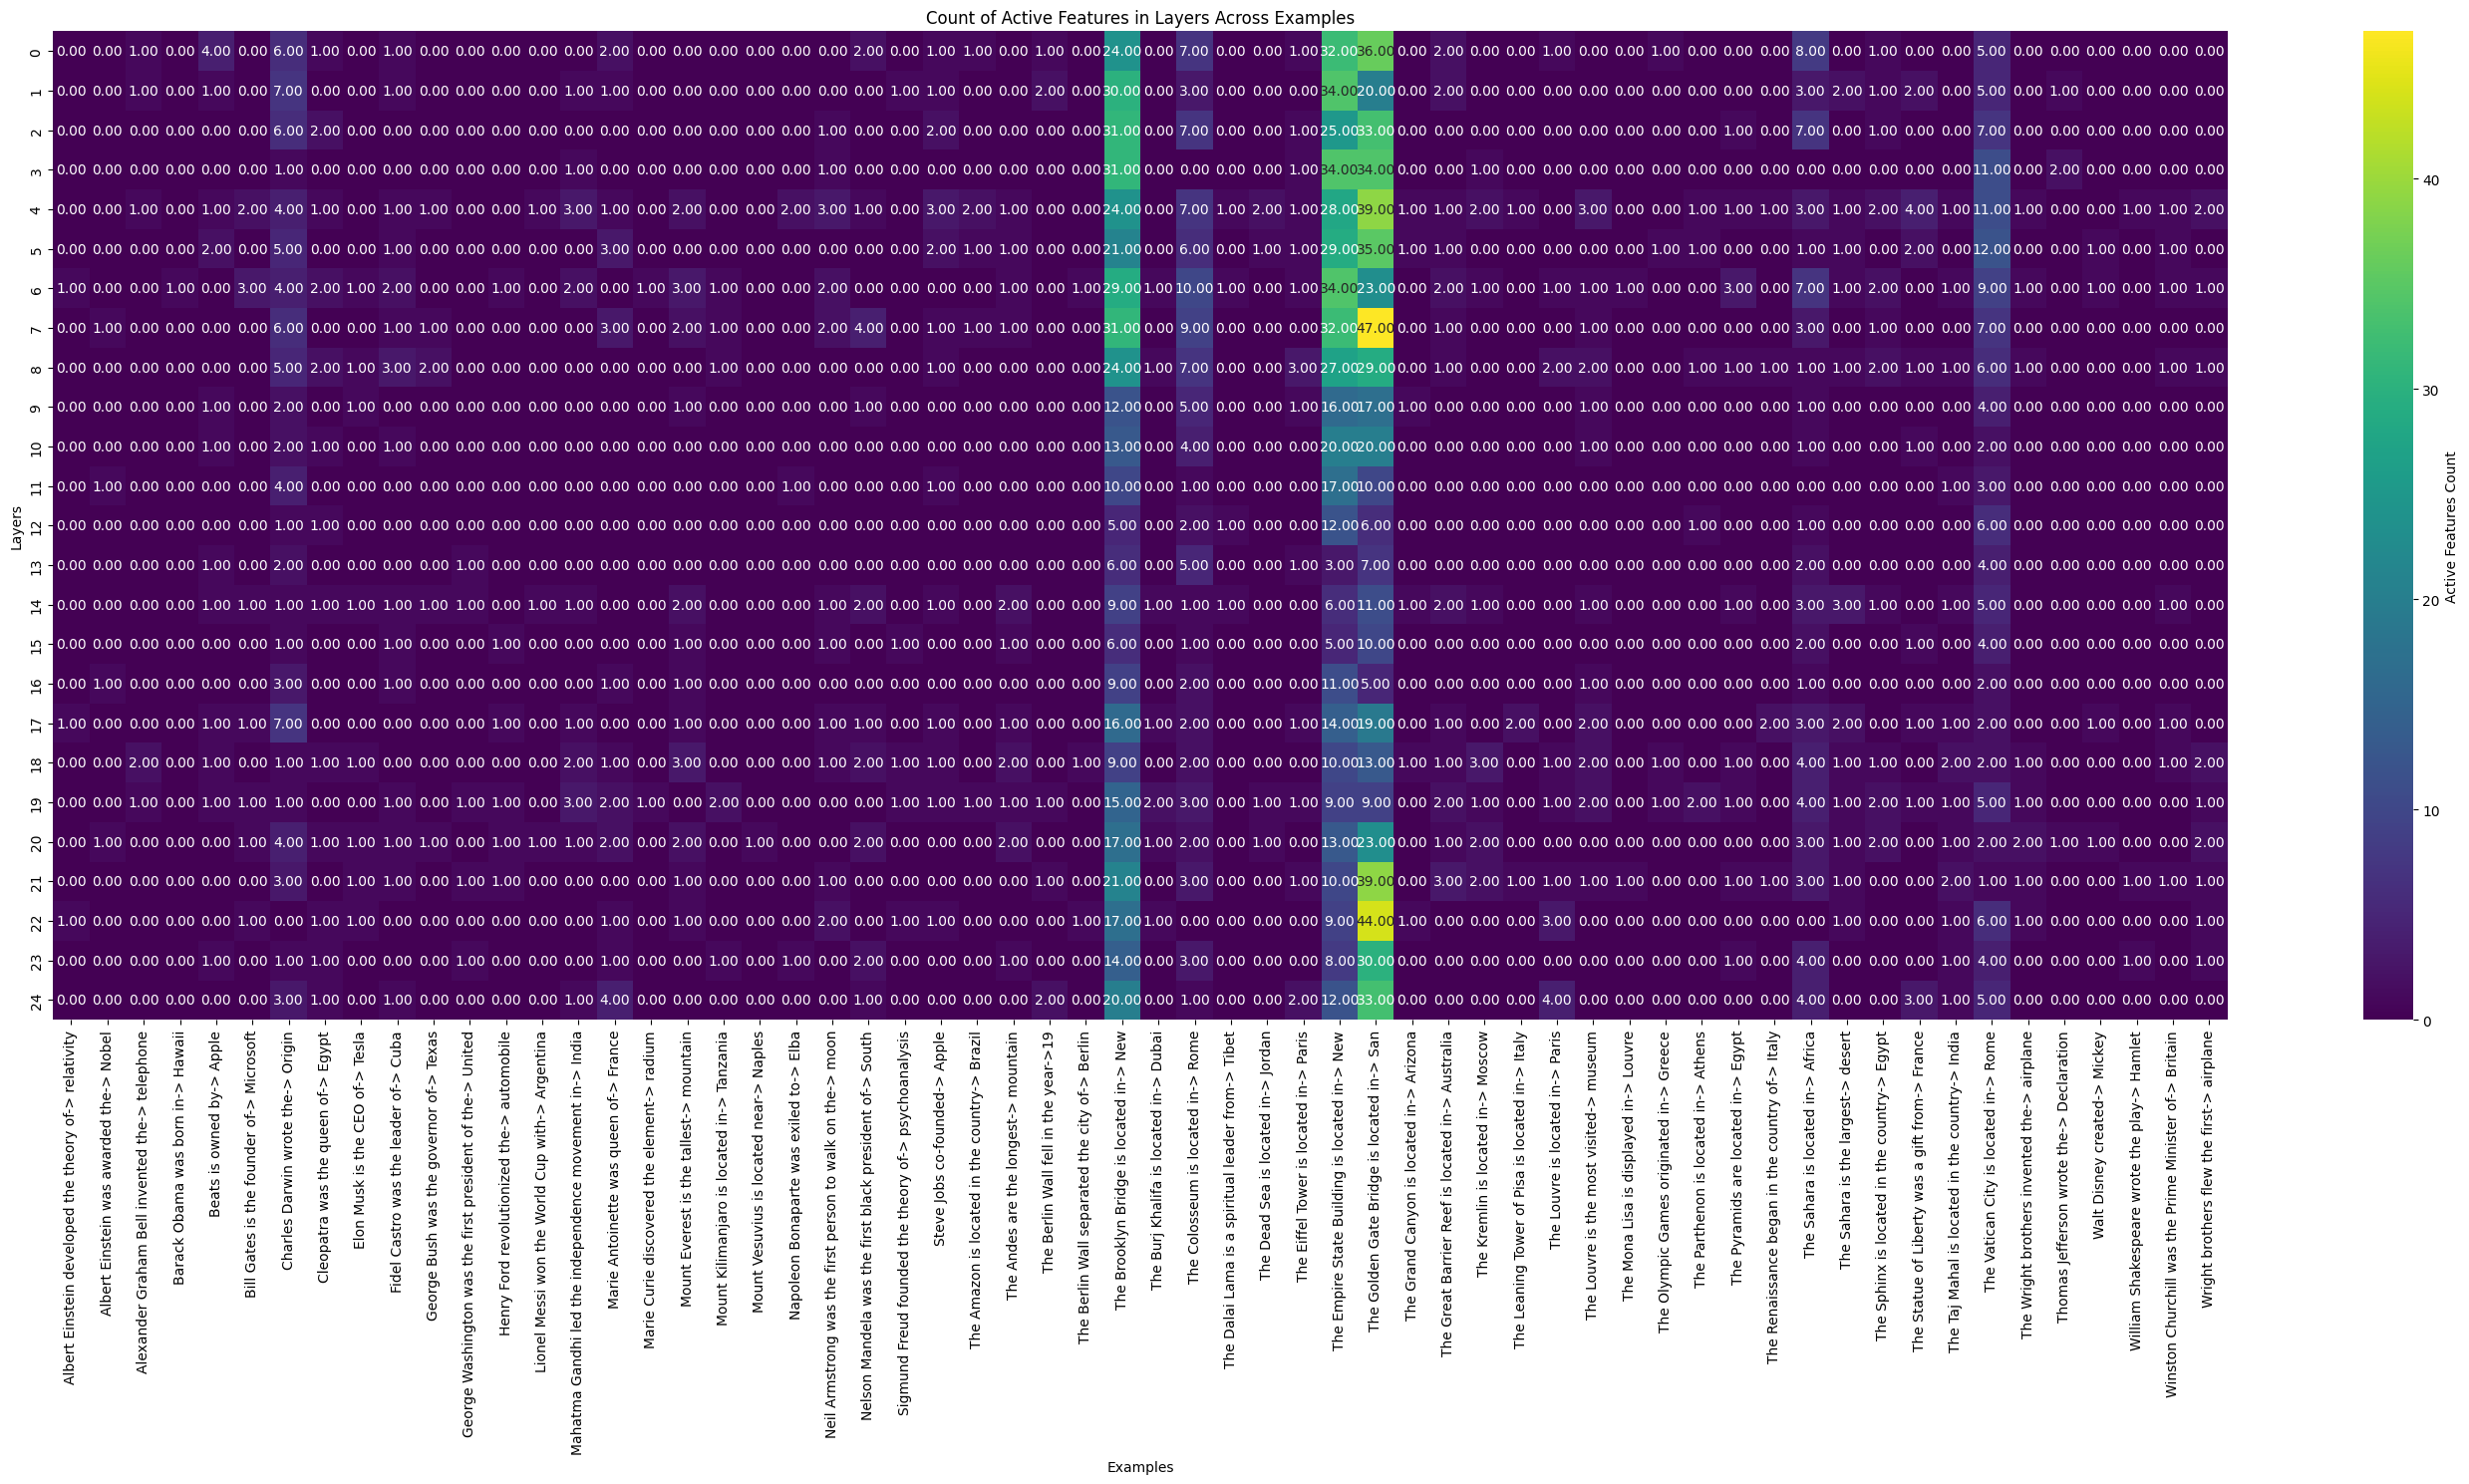

/tmp/ipykernel_831990/1543668067.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_count.index, y=average_count.values, palette='viridis')


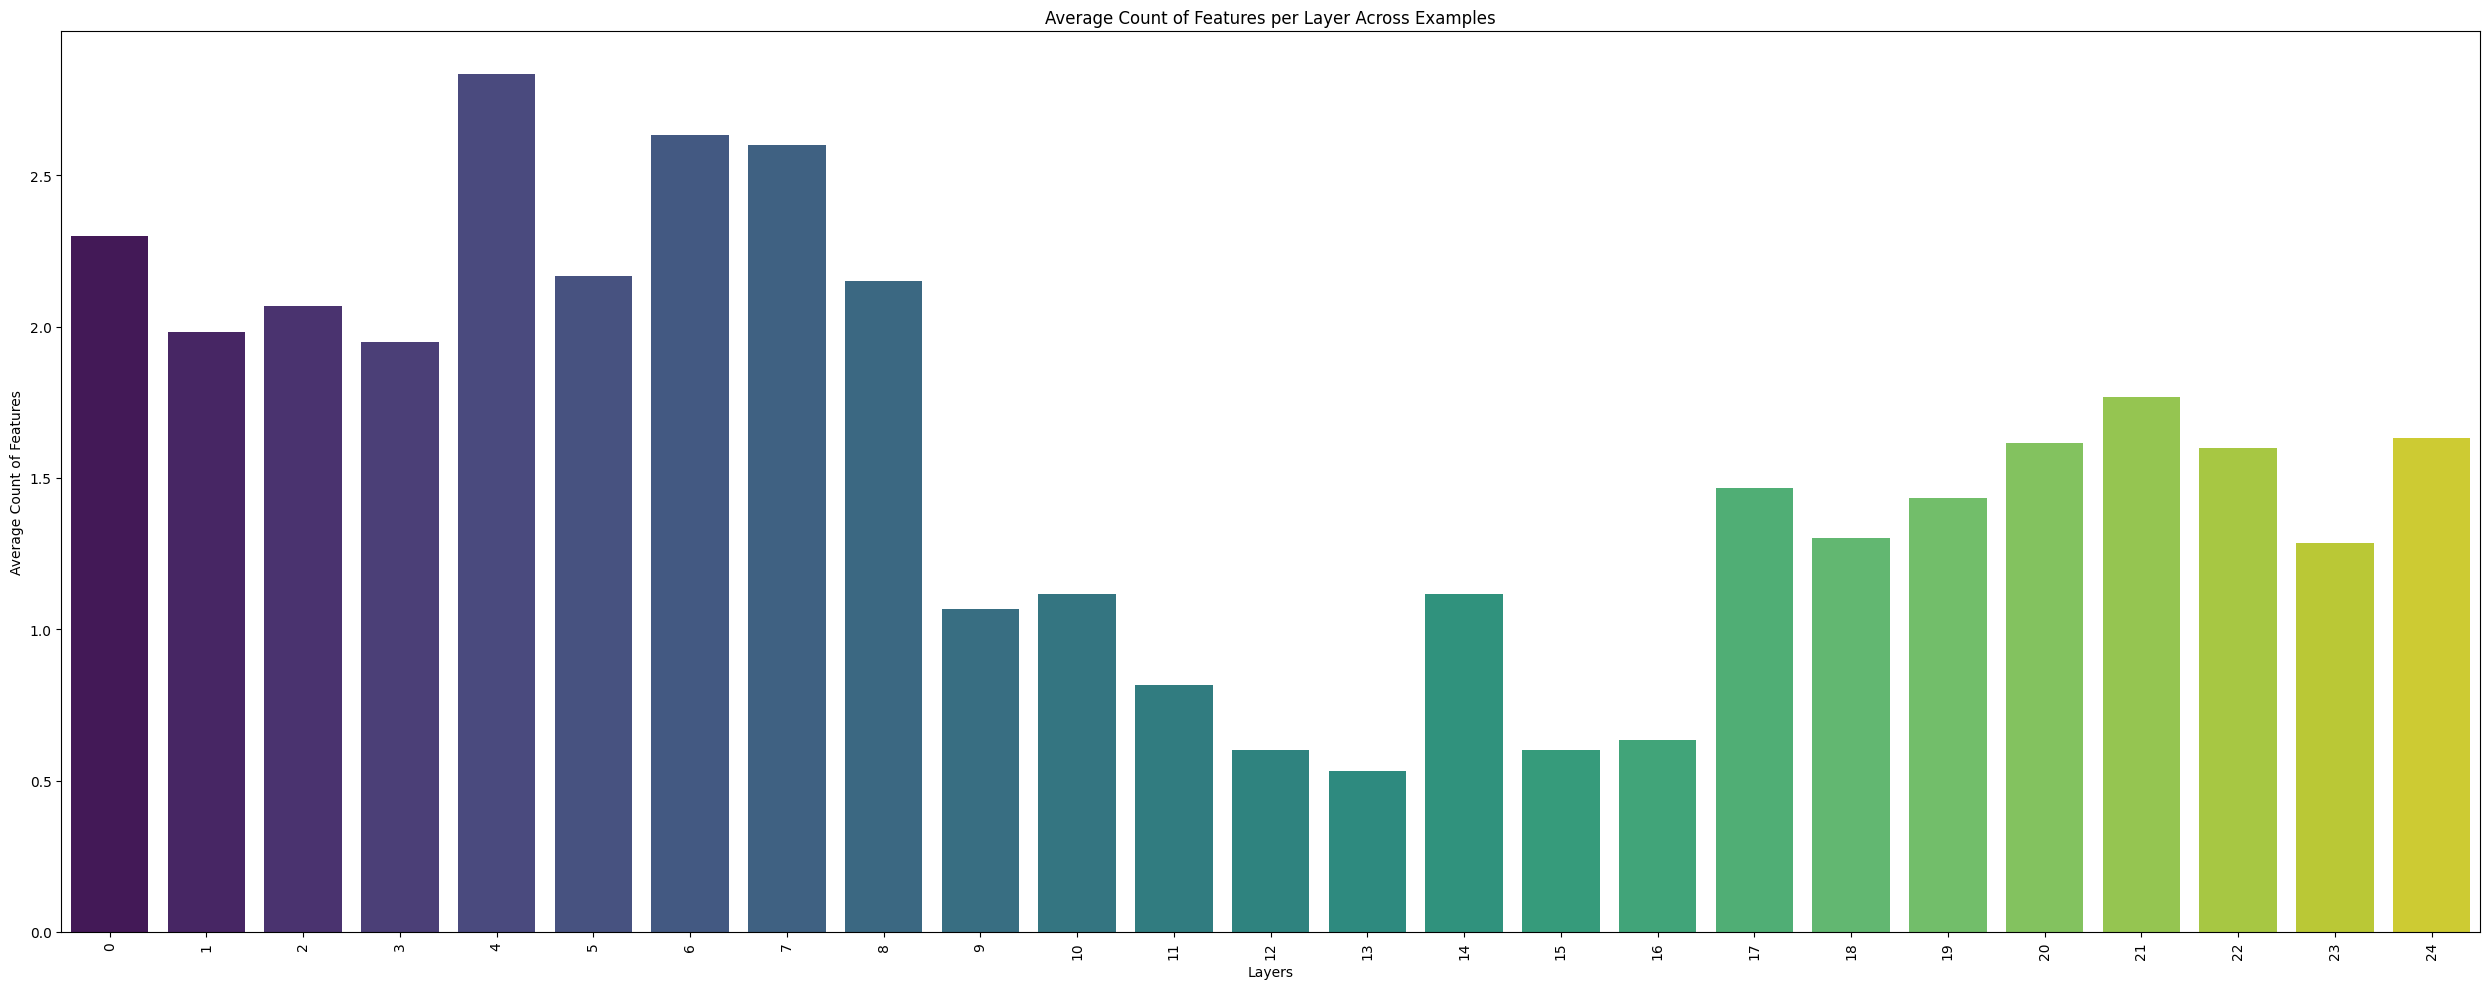

In [28]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    count_matrix = features_df.pivot_table(
        index='layer', 
        columns='example', 
        values='layer_index', 
        aggfunc='count', 
        fill_value=0
    )

    plt.figure(figsize=(28, 15))
    sns.heatmap(count_matrix, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Active Features Count'})
    plt.title('Count of Active Features in Layers Across Examples')
    plt.ylabel('Layers')
    plt.xlabel('Examples')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

    average_count = count_matrix.mean(axis=1)

    plt.figure(figsize=(25, 10))
    sns.barplot(x=average_count.index, y=average_count.values, palette='viridis')
    
    plt.title('Average Count of Features per Layer Across Examples')
    plt.ylabel('Average Count of Features')
    plt.xlabel('Layers')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_831990/1337945280.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_activation_count_ratio.index, y=average_activation_count_ratio.values, palette='viridis')


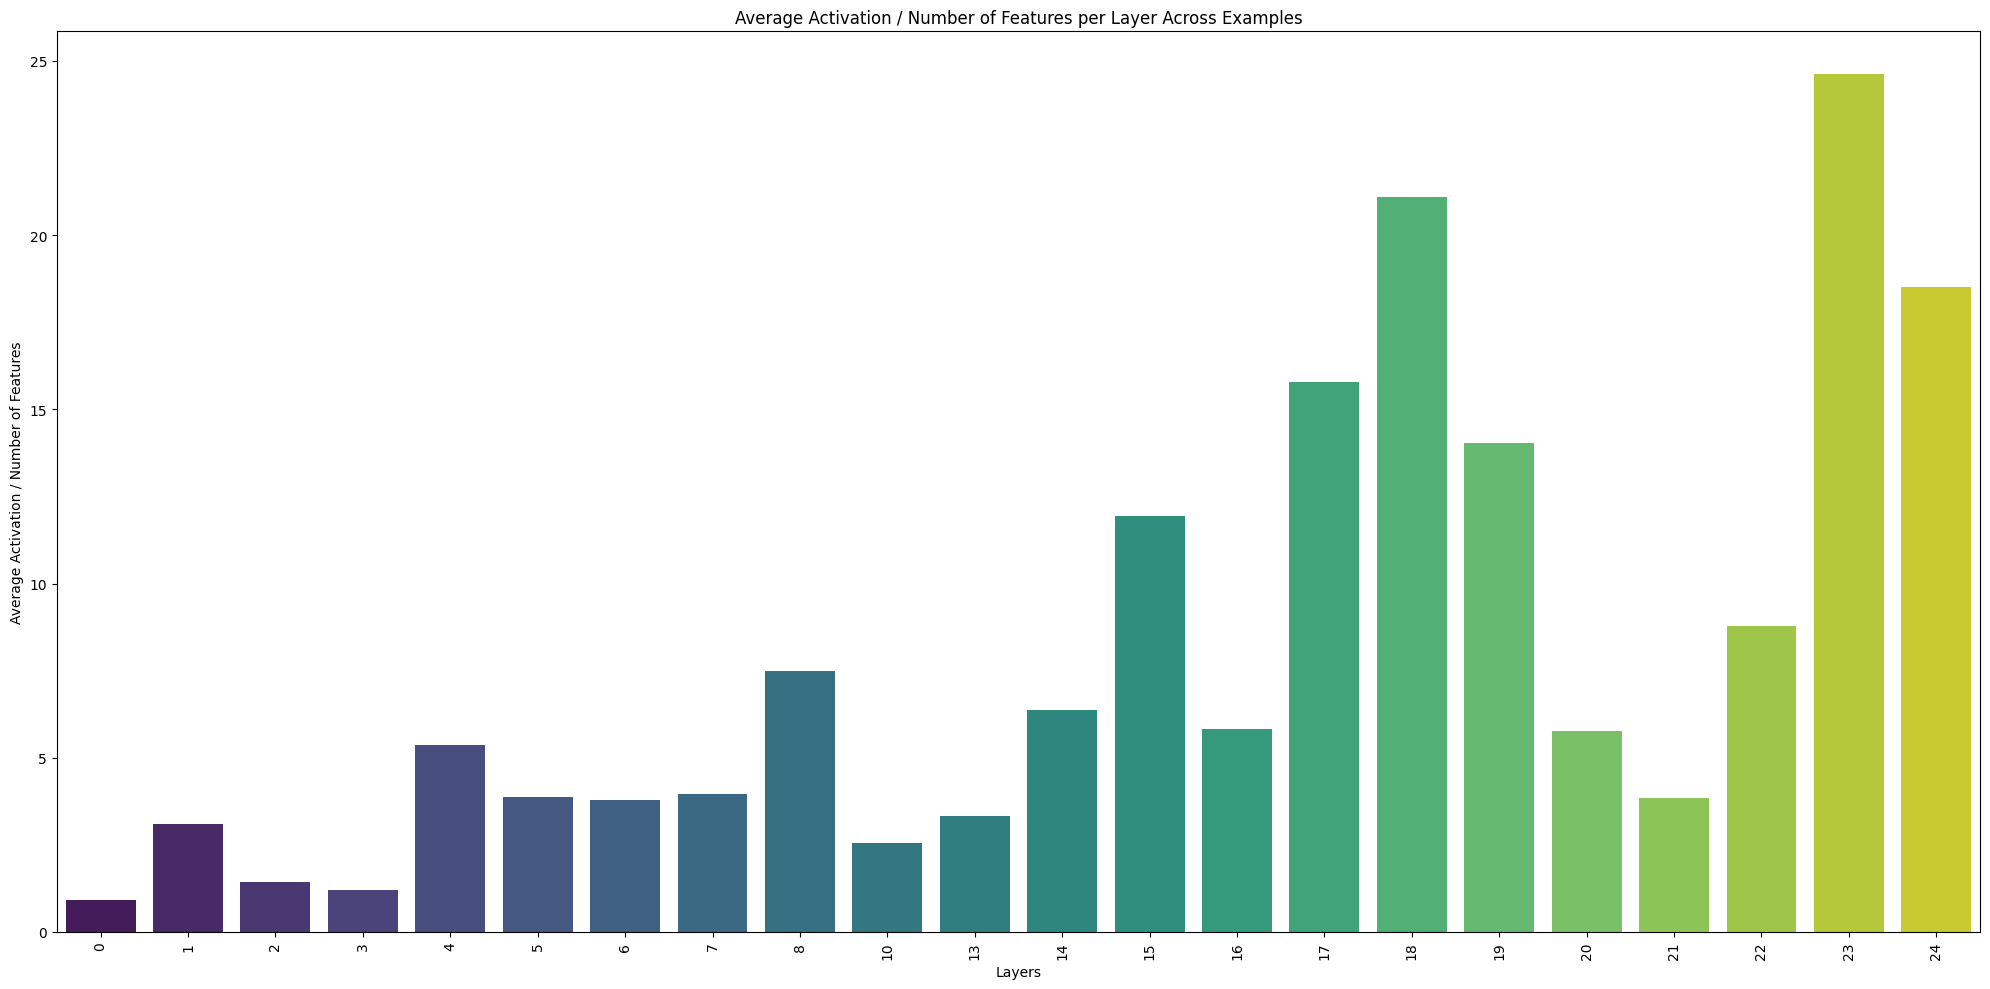

found features


/tmp/ipykernel_831990/1337945280.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_activation_count_ratio.index, y=average_activation_count_ratio.values, palette='viridis')


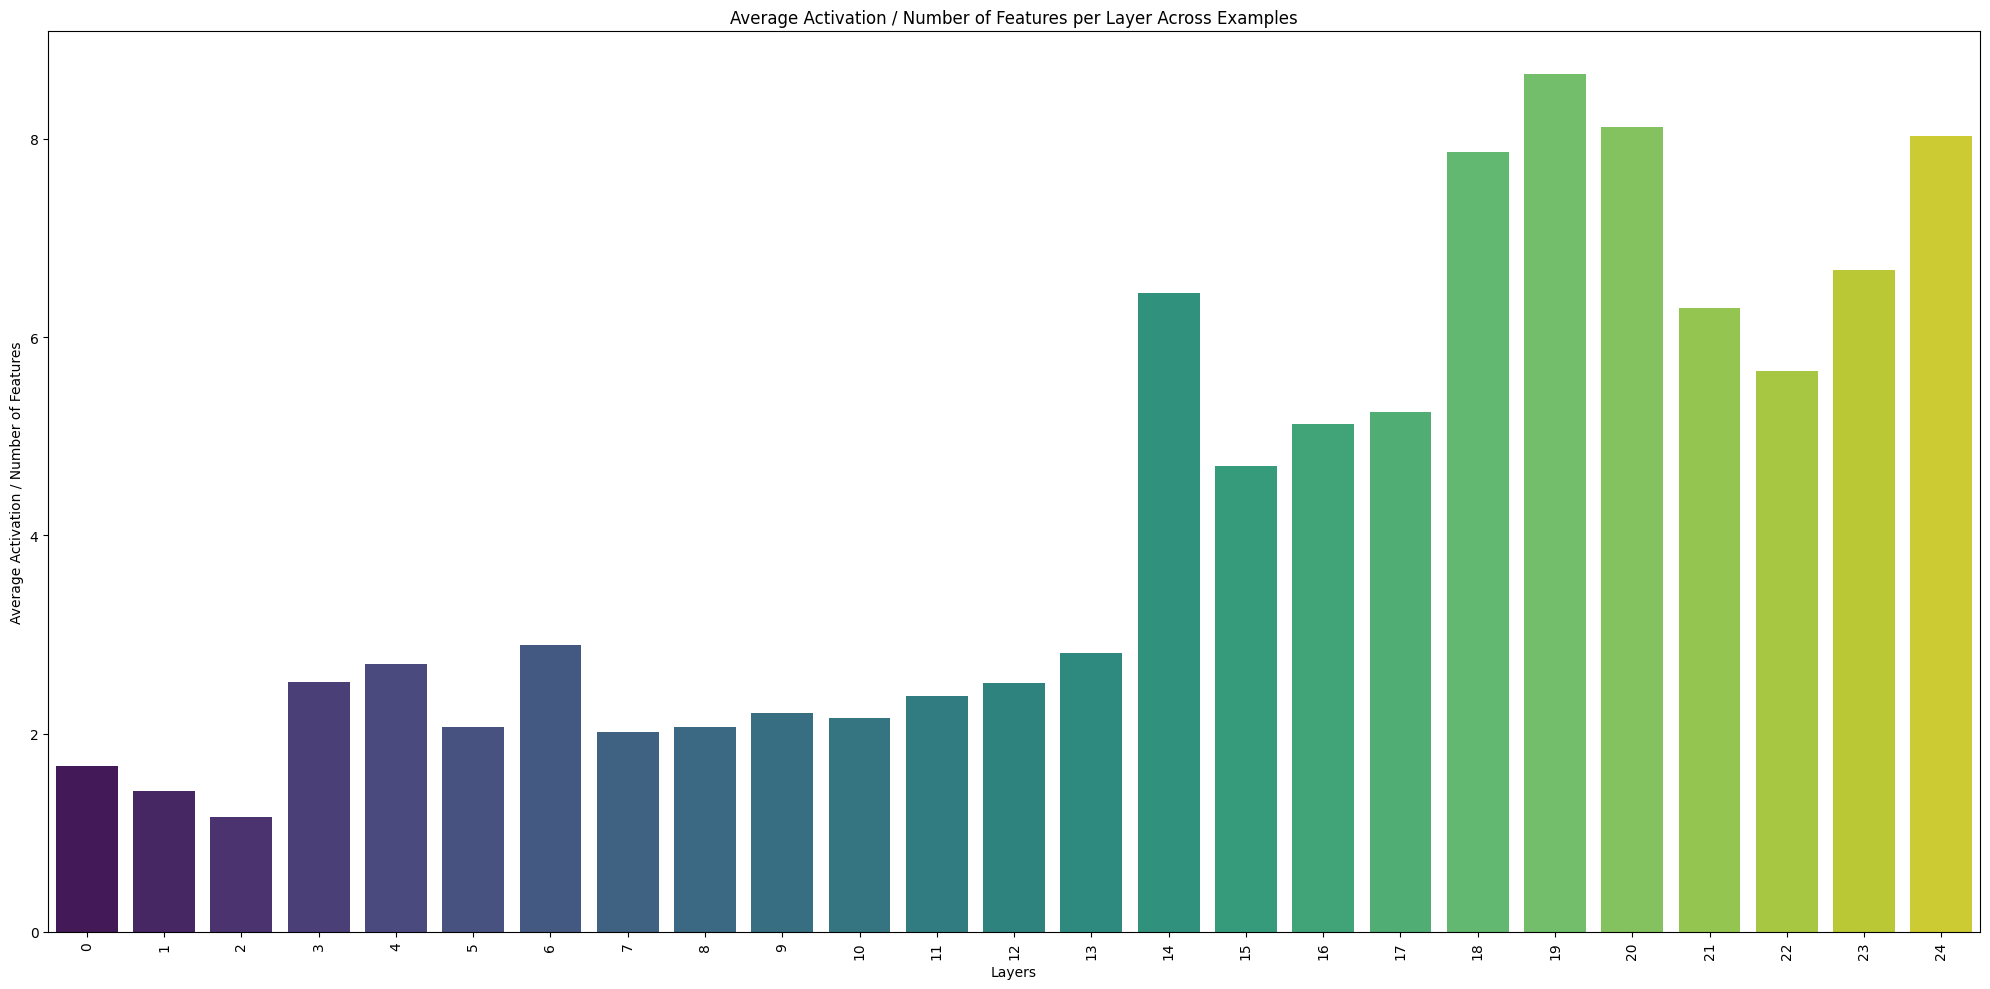

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    count_matrix = features_df.pivot_table(
        index='layer', 
        columns='example', 
        values='activation', 
        aggfunc='count', 
        fill_value=0
    )

    activation_matrix = features_df.pivot_table(
        index='layer', 
        columns='example', 
        values='activation', 
        aggfunc='sum', 
        fill_value=0
    )

    average_count = count_matrix.mean(axis=1)
    average_activation = activation_matrix.mean(axis=1)

    average_activation_count_ratio = average_activation / average_count

    plt.figure(figsize=(20, 10))
    sns.barplot(x=average_activation_count_ratio.index, y=average_activation_count_ratio.values, palette='viridis')
    
    plt.title('Average Activation / Number of Features per Layer Across Examples')
    plt.ylabel('Average Activation / Number of Features')
    plt.xlabel('Layers')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()


min features


/tmp/ipykernel_159273/2271132651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='unique_layer_count', data=layer_count, palette='viridis')


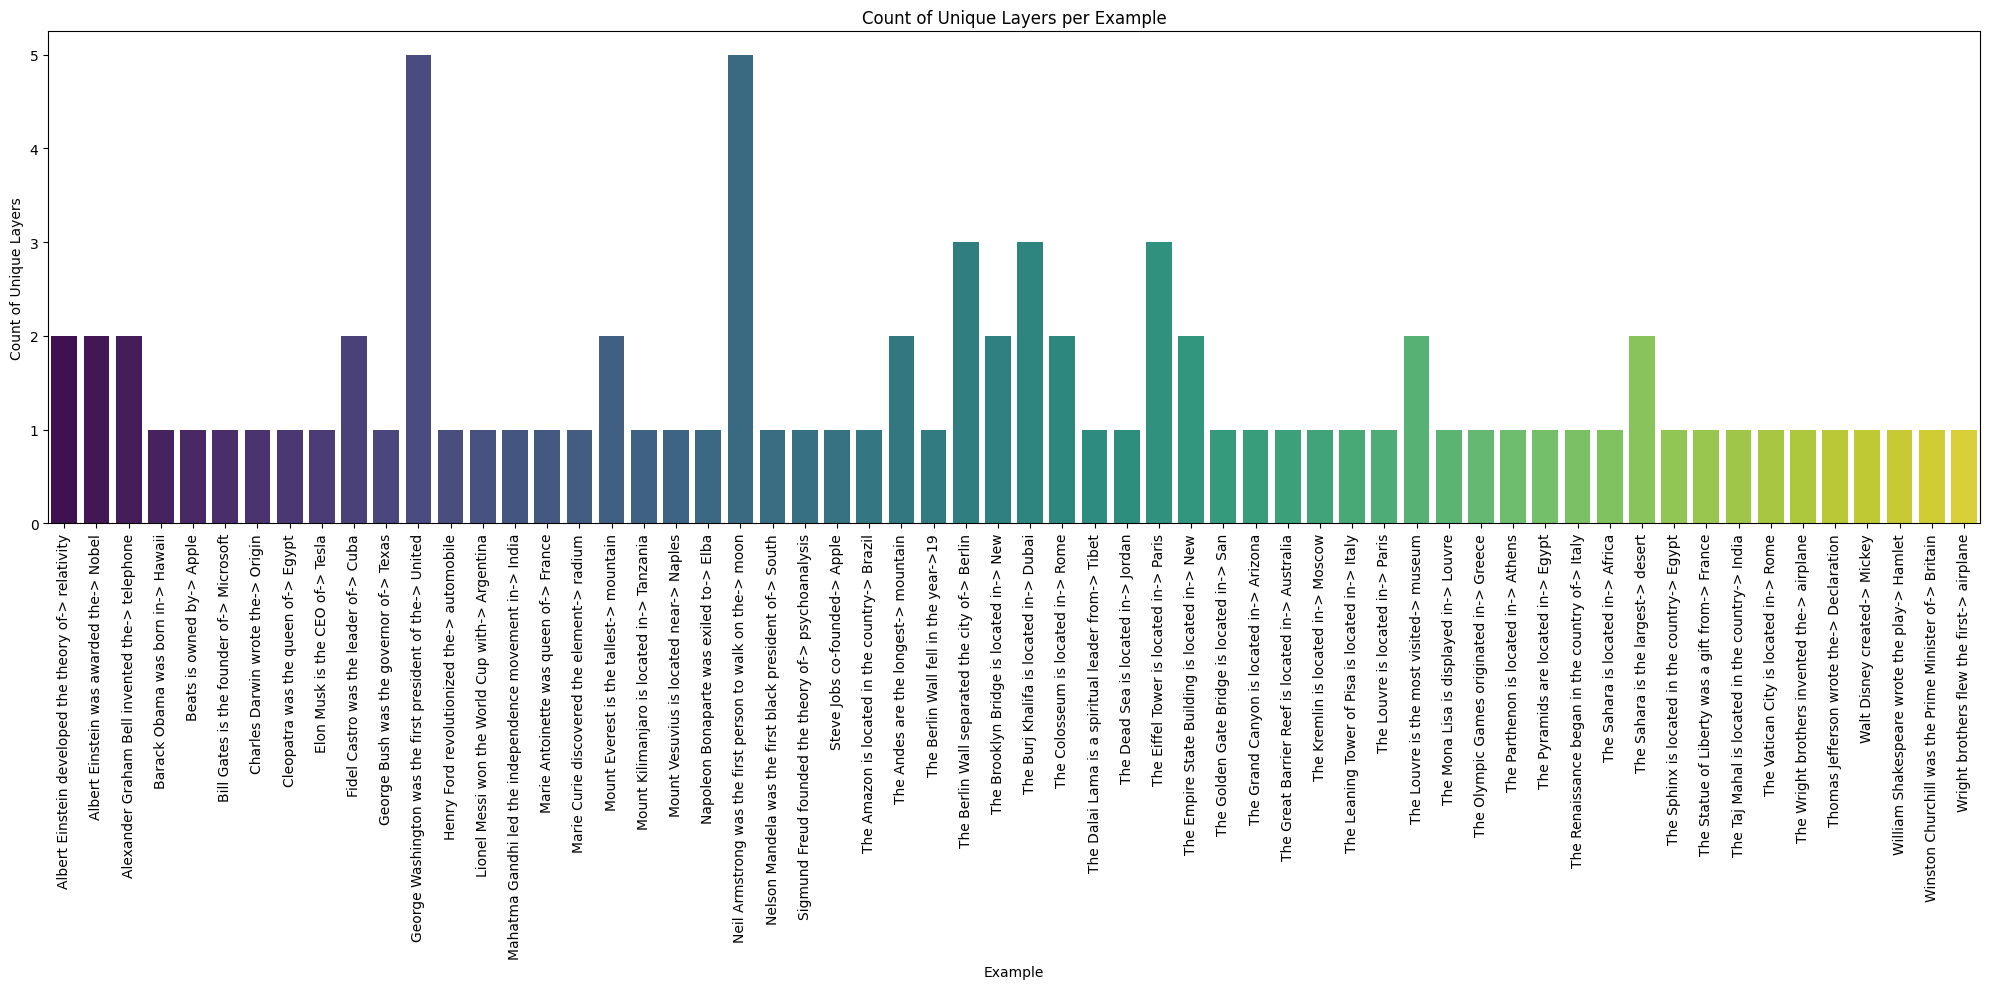

found features


/tmp/ipykernel_159273/2271132651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='unique_layer_count', data=layer_count, palette='viridis')


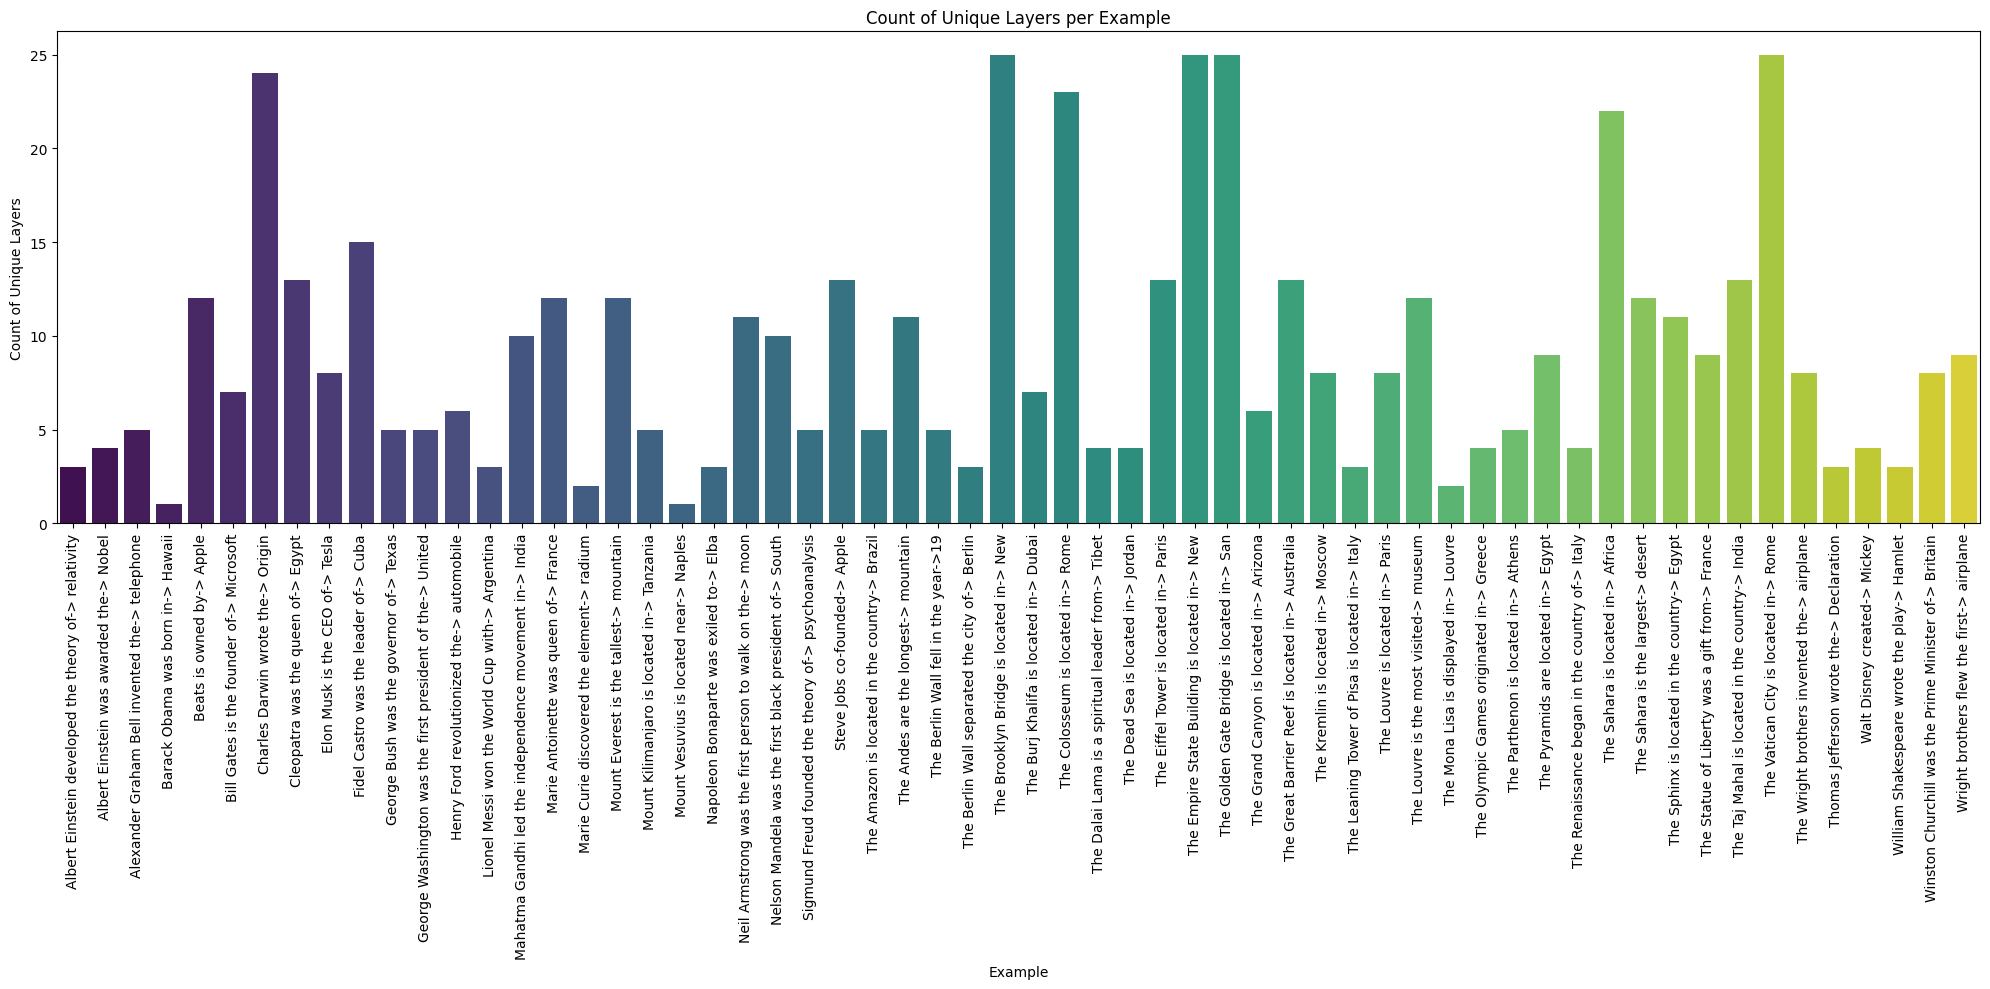

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    layer_count = features_df.pivot_table(
        index='example', 
        values='layer', 
        aggfunc='nunique'
    ).reset_index()

    layer_count.columns = ['example', 'unique_layer_count']

    plt.figure(figsize=(20, 10))
    sns.barplot(x='example', y='unique_layer_count', data=layer_count, palette='viridis')
    
    plt.title('Count of Unique Layers per Example')
    plt.ylabel('Count of Unique Layers')
    plt.xlabel('Example')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()


min features


/tmp/ipykernel_159273/505318943.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')


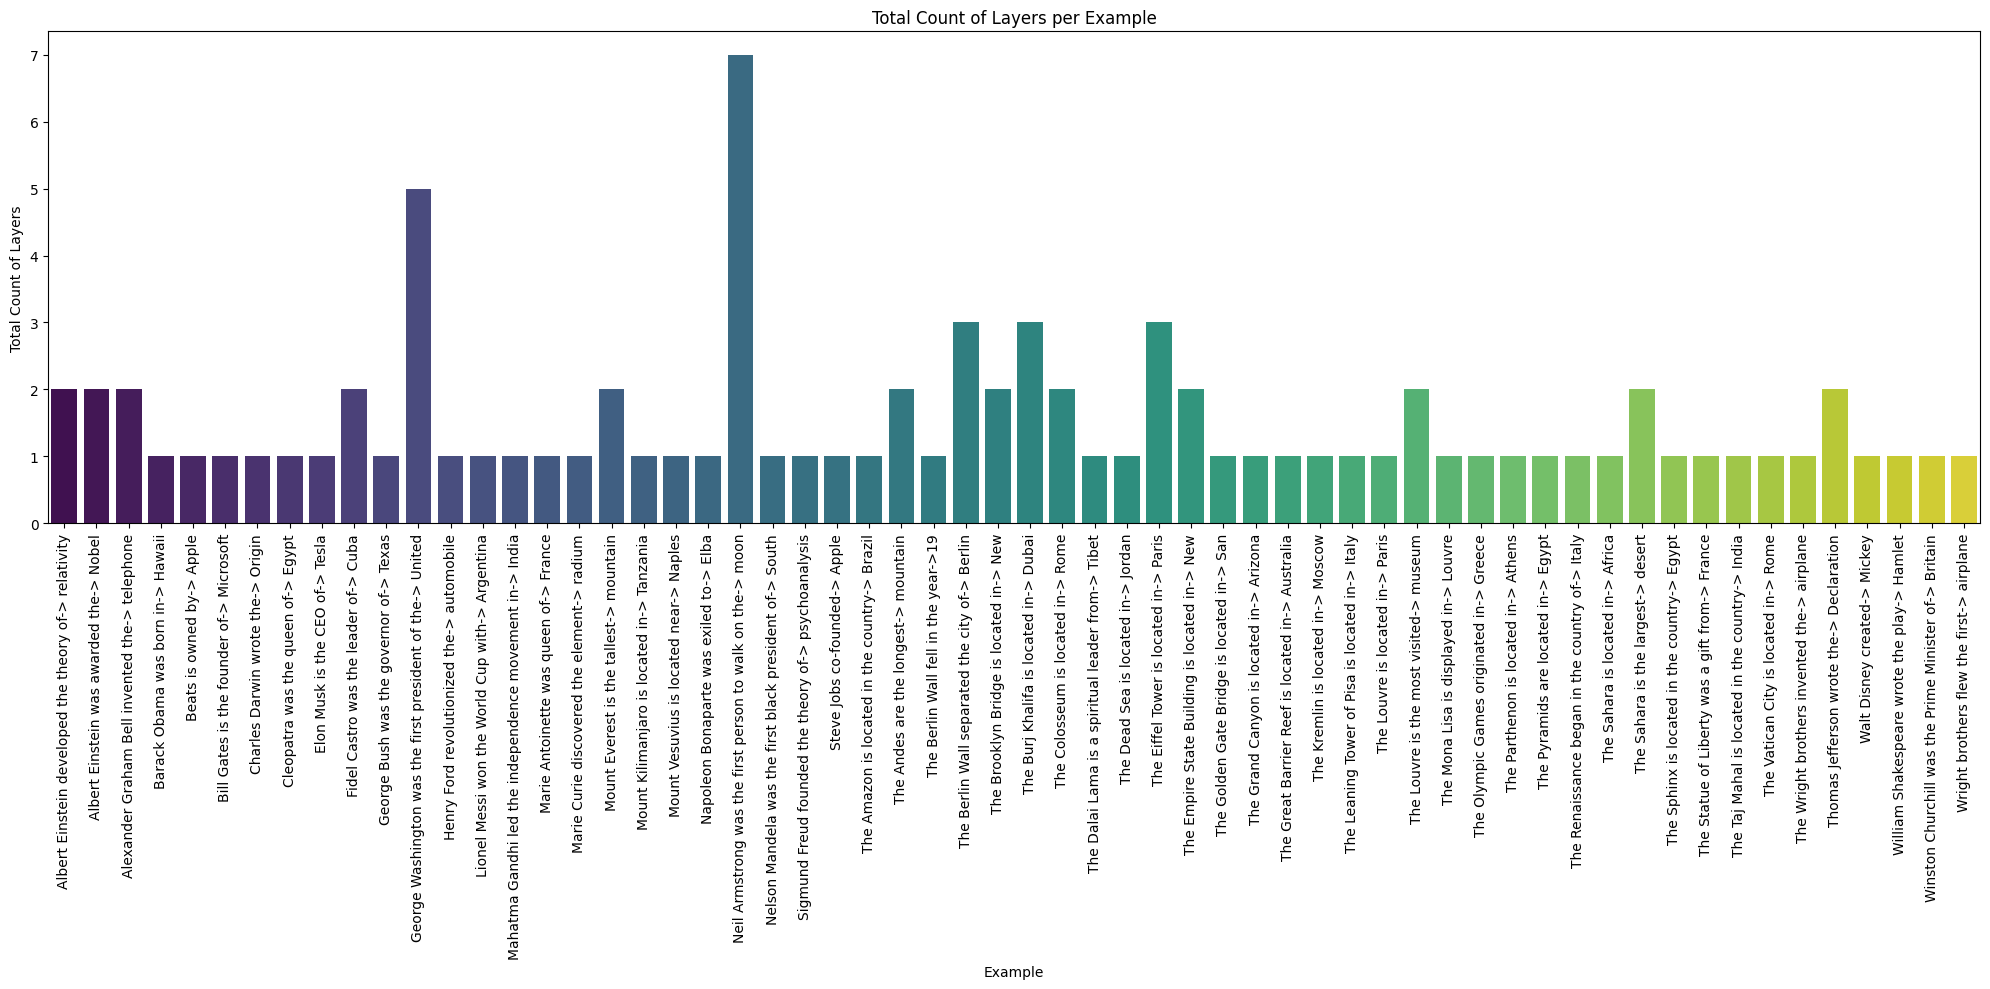

found features


/tmp/ipykernel_159273/505318943.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')


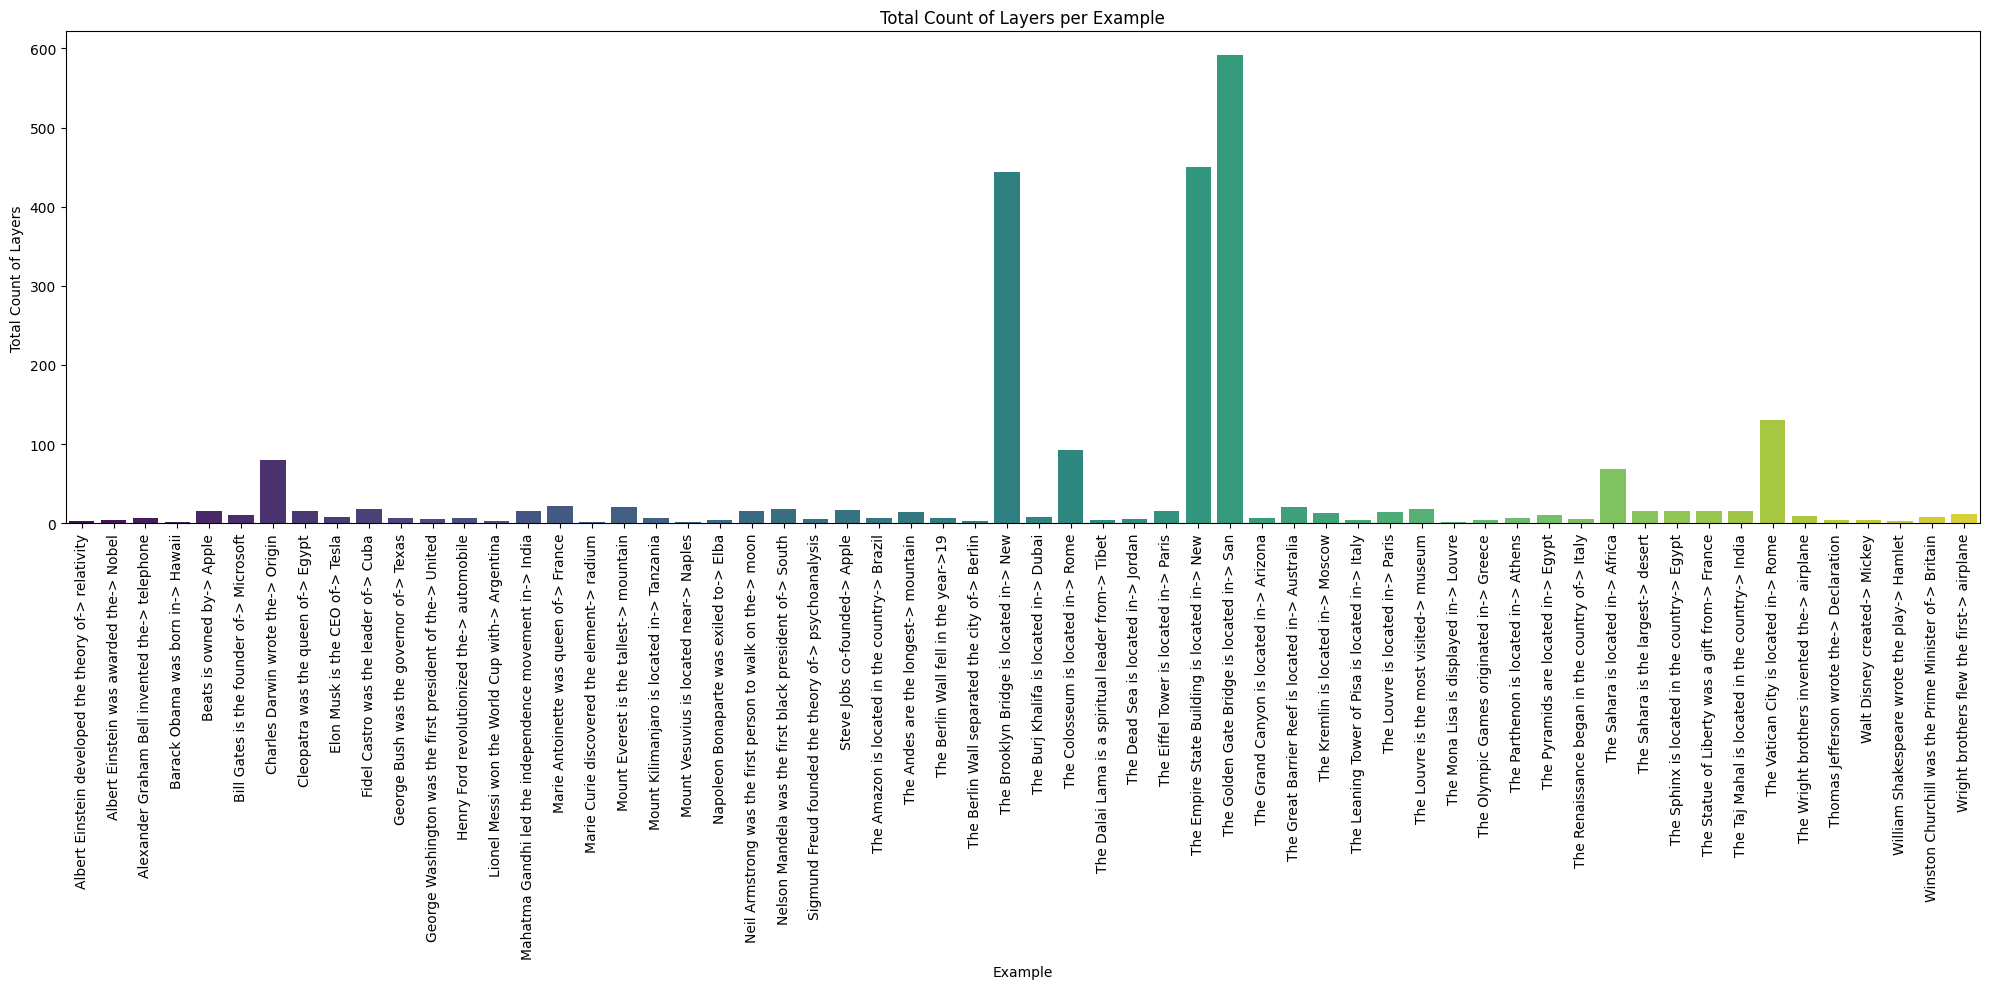

In [15]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    layer_count = features_df.pivot_table(
        index='example', 
        values='layer', 
        aggfunc='count' 
    ).reset_index()
    layer_count.columns = ['example', 'total_layer_count']

    plt.figure(figsize=(20, 10))
    sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')
    
    plt.title('Total Count of Layers per Example')
    plt.ylabel('Total Count of Layers')
    plt.xlabel('Example')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_831990/1523134016.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='percentage', data=layer_counts, palette='viridis')


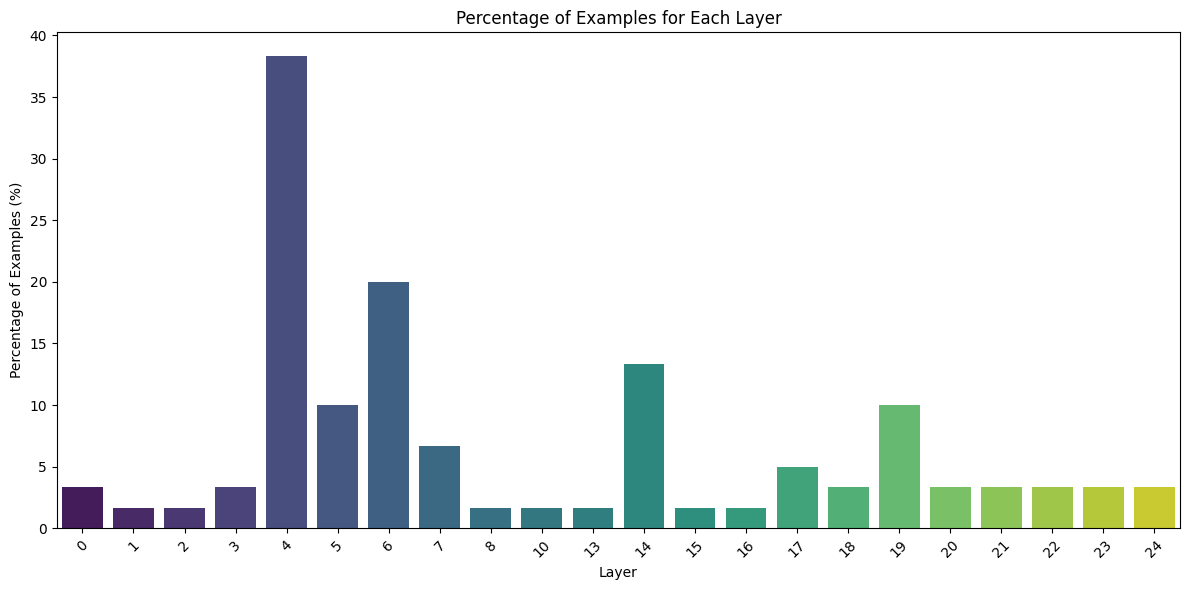

found features


/tmp/ipykernel_831990/1523134016.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='percentage', data=layer_counts, palette='viridis')


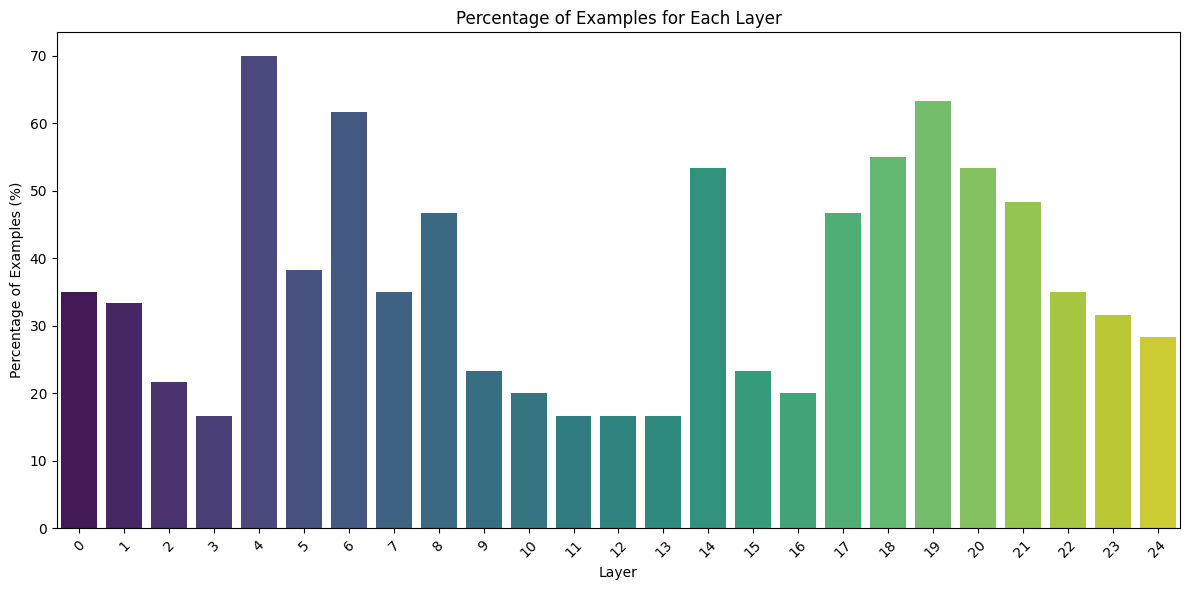

In [18]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    layer_counts = features_df.pivot_table(
        index='layer', 
        values='example', 
        aggfunc='nunique'
    ).reset_index()

    total_examples = features_df['example'].nunique()
    
    layer_counts['percentage'] = (layer_counts['example'] / total_examples) * 100

    plt.figure(figsize=(12, 6))
    sns.barplot(x='layer', y='percentage', data=layer_counts, palette='viridis')
    
    plt.title('Percentage of Examples for Each Layer')
    plt.ylabel('Percentage of Examples (%)')
    plt.xlabel('Layer')
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


min features


/tmp/ipykernel_831990/24974241.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='unique_feature_count', data=layer_counts, palette='viridis')


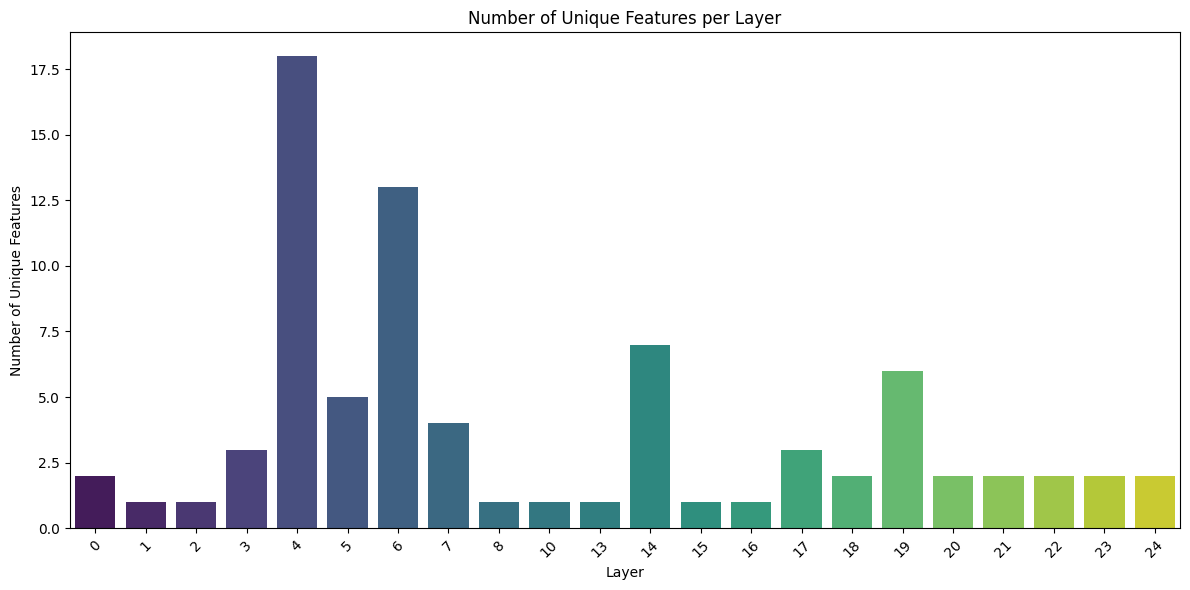

found features


/tmp/ipykernel_831990/24974241.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='unique_feature_count', data=layer_counts, palette='viridis')


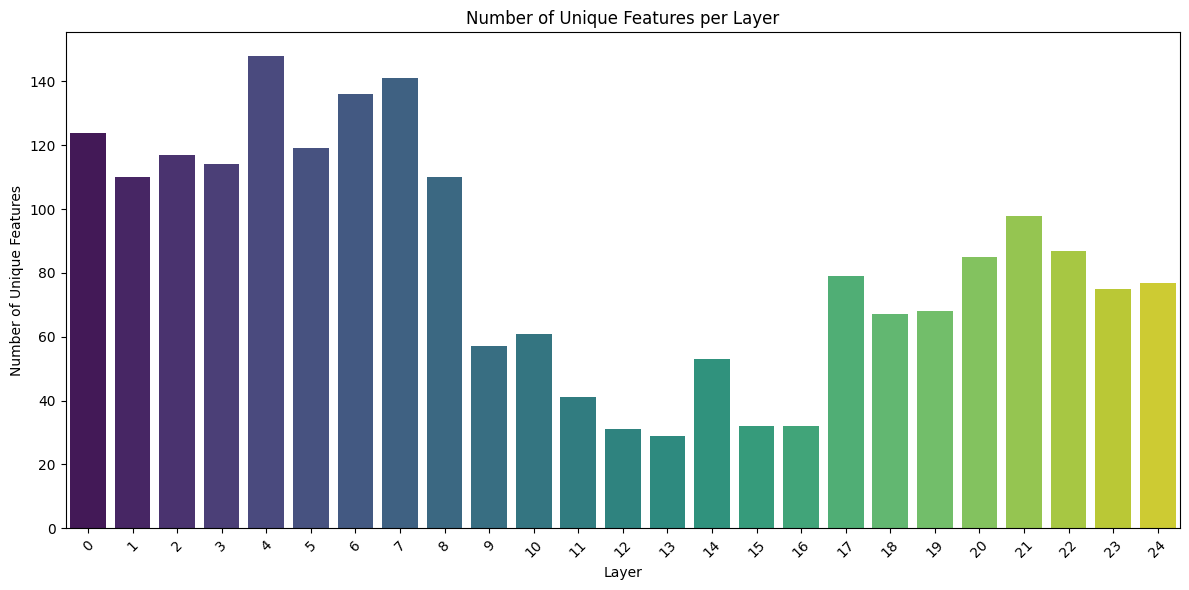

In [19]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    layer_counts = features_df.pivot_table(
        index='layer', 
        values='layer_index', 
        aggfunc='nunique'  # Count unique features
    ).reset_index()

    layer_counts.columns = ['layer', 'unique_feature_count']

    plt.figure(figsize=(12, 6))
    sns.barplot(x='layer', y='unique_feature_count', data=layer_counts, palette='viridis')
    
    plt.title('Number of Unique Features per Layer')
    plt.ylabel('Number of Unique Features')
    plt.xlabel('Layer')
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_831990/1279685723.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='total_feature_count', data=layer_counts, palette='viridis')


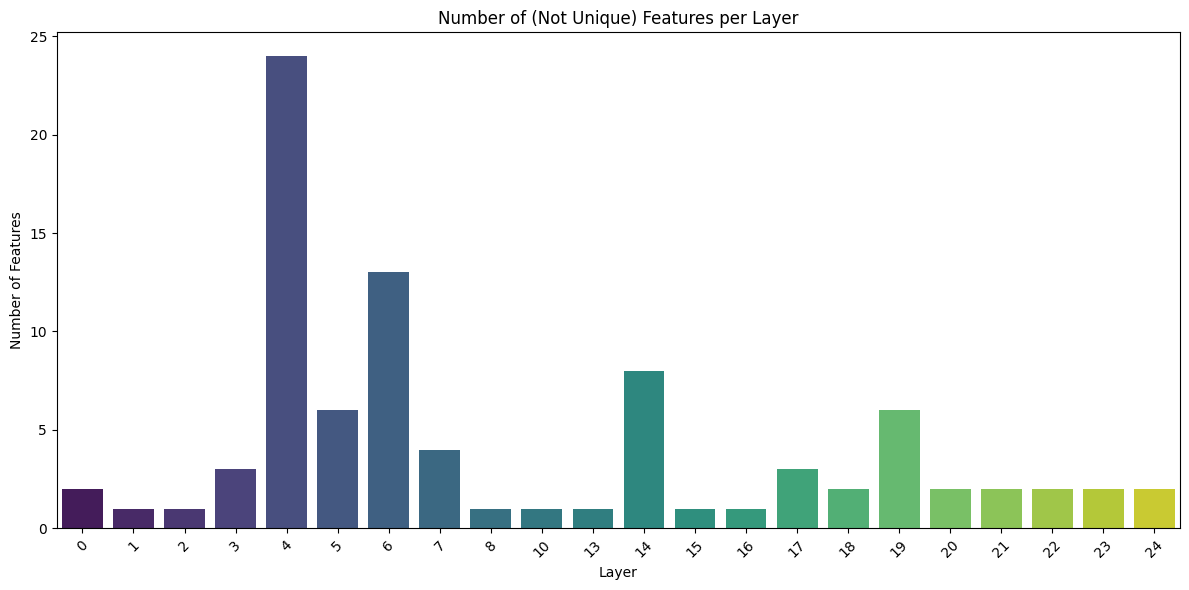

found features


/tmp/ipykernel_831990/1279685723.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='total_feature_count', data=layer_counts, palette='viridis')


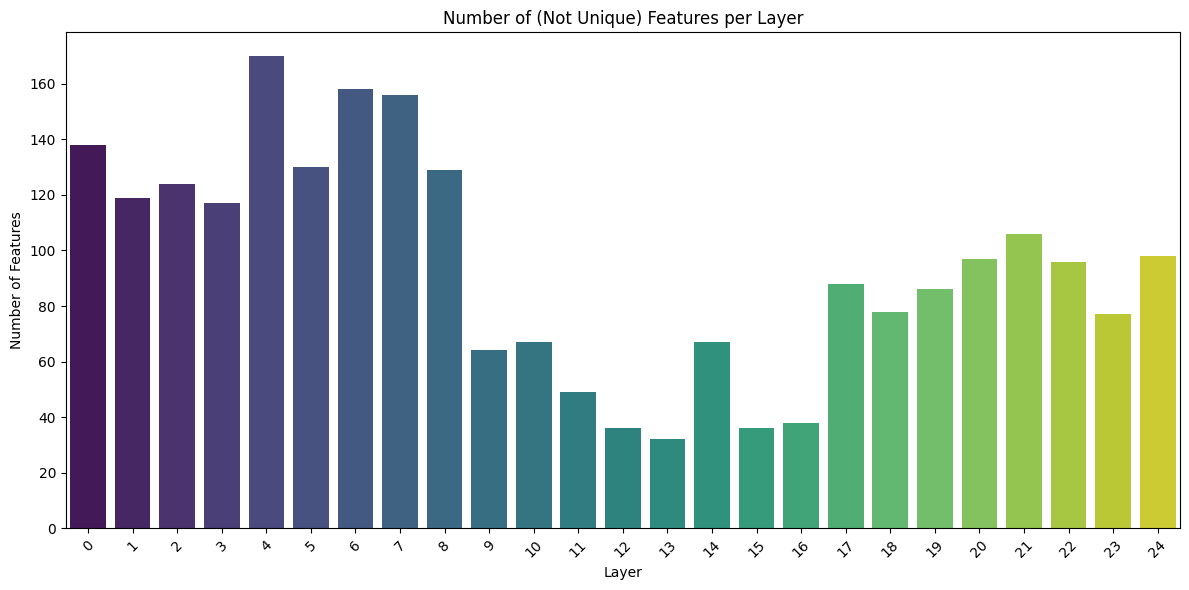

In [20]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")

    layer_counts = features_df.pivot_table(
        index='layer', 
        values='layer_index', 
        aggfunc='count'  # Count total features
    ).reset_index()

    layer_counts.columns = ['layer', 'total_feature_count']

    plt.figure(figsize=(12, 6))
    sns.barplot(x='layer', y='total_feature_count', data=layer_counts, palette='viridis')
    
    plt.title('Number of (Not Unique) Features per Layer')
    plt.ylabel('Number of Features')
    plt.xlabel('Layer')
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()

min features


/tmp/ipykernel_831990/1241674787.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer_index', y='count', data=top_layers, palette='viridis')


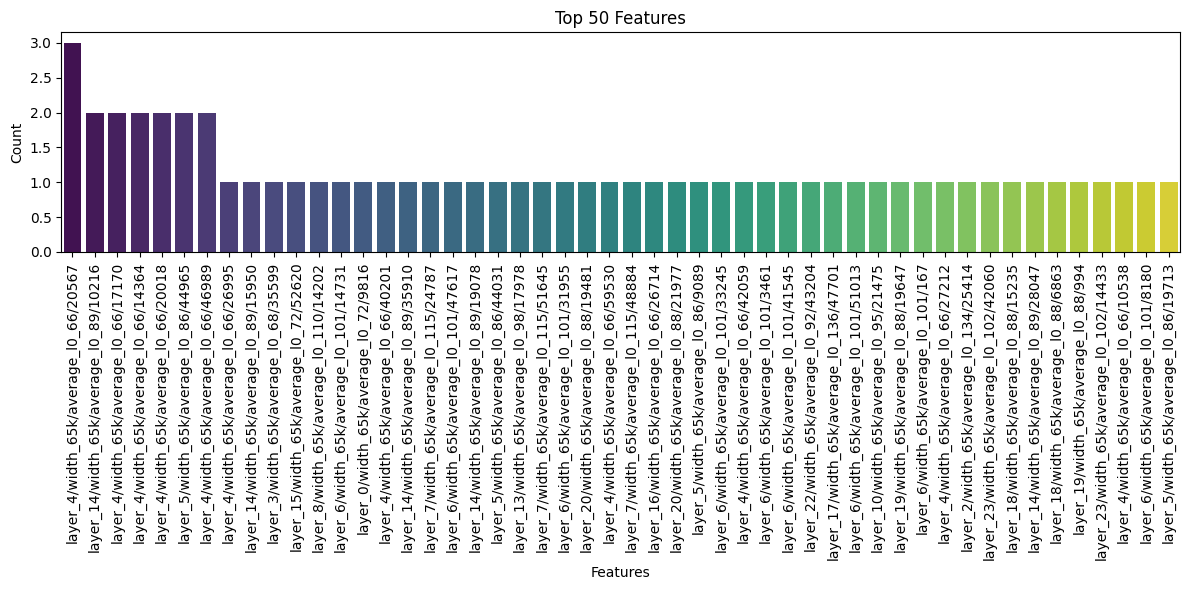

found features


/tmp/ipykernel_831990/1241674787.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer_index', y='count', data=top_layers, palette='viridis')


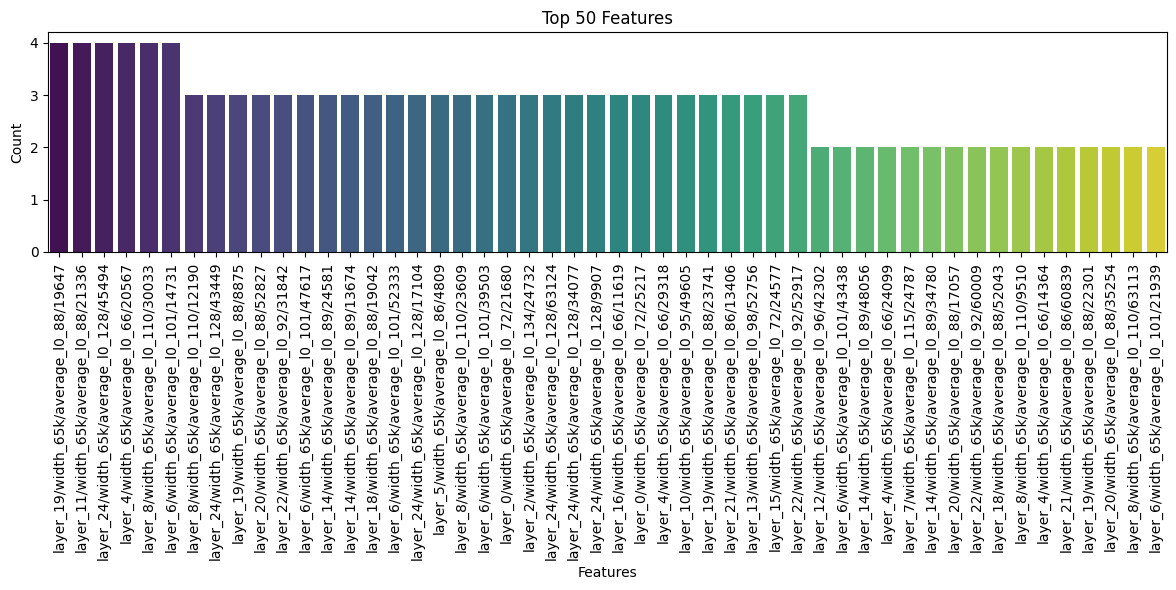

In [21]:
for name, features_df in [("min features", min_features_df), ("found features", found_features_df)]:
    print(f"{name}")
    layer_count = features_df['layer_index'].value_counts().reset_index()
    layer_count.columns = ['layer_index', 'count']
    
    top_n = 50
    top_layers = layer_count.head(top_n)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='layer_index', y='count', data=top_layers, palette='viridis')
    
    plt.title(f'Top {top_n} Features')
    plt.ylabel('Count')
    plt.xlabel('Features')
    plt.xticks(rotation=90, fontsize=10)
    plt.tight_layout()
    plt.show()

In [22]:
print(len(output_df))

63


In [23]:
print(len(min_features_df))

88


In [24]:
print(len(found_features_df))

2356


# For Paper

## Final Pipeline: Figure 2

In [36]:
found_features_df.head()

example   object       subject  layer  \
0        Barack Obama was born in-> Hawaii   Hawaii  Barack Obama      6   
1  George Bush was the governor of-> Texas    Texas   George Bush     20   
2  George Bush was the governor of-> Texas    Texas   George Bush      8   
3  George Bush was the governor of-> Texas    Texas   George Bush      7   
4  George Bush was the governor of-> Texas    Texas   George Bush      8   

   index  activation                             layer_index  
0  62465    1.282317  layer_6/width_65k/average_l0_101/62465  
1   6027   11.442189   layer_20/width_65k/average_l0_88/6027  
2  46230    2.594975  layer_8/width_65k/average_l0_110/46230  
3  64391    4.383185  layer_7/width_65k/average_l0_115/64391  
4  15009    2.097821  layer_8/width_65k/average_l0_110/15009

In [54]:
found_features_df['example_count'] = found_features_df['example'].map(found_features_df['example'].value_counts())
found_features_df.head()

example   object       subject  layer  \
0        Barack Obama was born in-> Hawaii   Hawaii  Barack Obama      6   
1  George Bush was the governor of-> Texas    Texas   George Bush     20   
2  George Bush was the governor of-> Texas    Texas   George Bush      8   
3  George Bush was the governor of-> Texas    Texas   George Bush      7   
4  George Bush was the governor of-> Texas    Texas   George Bush      8   

   index  activation                             layer_index  example_count  
0  62465    1.282317  layer_6/width_65k/average_l0_101/62465              1  
1   6027   11.442189   layer_20/width_65k/average_l0_88/6027              6  
2  46230    2.594975  layer_8/width_65k/average_l0_110/46230              6  
3  64391    4.383185  layer_7/width_65k/average_l0_115/64391              6  
4  15009    2.097821  layer_8/width_65k/average_l0_110/15009              6

found features


/tmp/ipykernel_159273/1326545271.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')


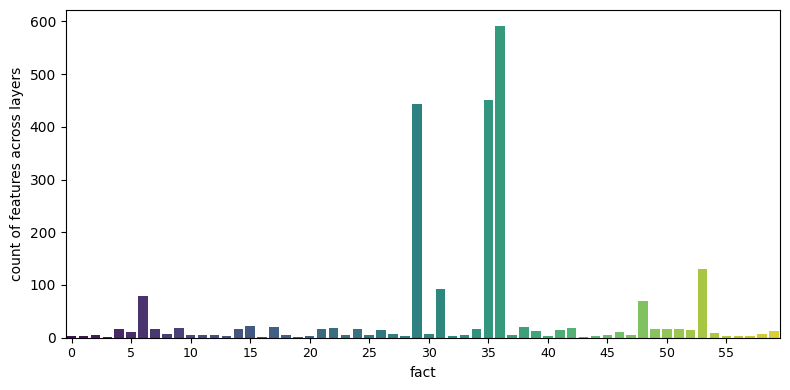

In [141]:
name = "found features"
features_df = found_features_df
print(f"{name}")

layer_count = features_df.pivot_table(
    index='example', 
    values='layer', 
    aggfunc='count' 
).reset_index()
layer_count.columns = ['example', 'total_layer_count']

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')

#ax.set_xticks([])
# Show x-tick labels every 5th index
ax.set_xticks(layer_count.index[::5])  # Set tick locations at every 5th index
ax.set_xticklabels(layer_count.index[::5])  # Set labels for those tick locations

plt.ylabel('count of features across layers')
plt.xlabel('fact')
#plt.xticks(rotation=90, fontsize=10)
plt.xticks(fontsize=9)
plt.tight_layout()
plt.savefig("2.pdf", format="pdf")
plt.show()

## Final Pipeline: Figure 3

min features


/tmp/ipykernel_159273/4030216358.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')


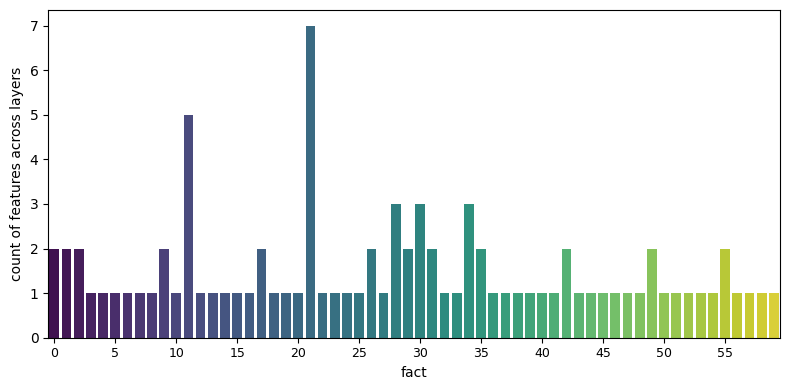

In [140]:
name = "min features"
features_df = min_features_df
print(f"{name}")

layer_count = features_df.pivot_table(
    index='example', 
    values='layer', 
    aggfunc='count' 
).reset_index()
layer_count.columns = ['example', 'total_layer_count']

plt.figure(figsize=(8, 4))
ax = sns.barplot(x='example', y='total_layer_count', data=layer_count, palette='viridis')

#ax.set_xticks([])
# Show x-tick labels every 5th index
ax.set_xticks(layer_count.index[::5])  # Set tick locations at every 5th index
ax.set_xticklabels(layer_count.index[::5])  # Set labels for those tick locations

plt.ylabel('count of features across layers')
plt.xlabel('fact')
#plt.xticks(rotation=90, fontsize=10)
plt.xticks(fontsize=9)
plt.tight_layout()
plt.savefig("3.pdf", format="pdf")
plt.show()

## Final Pipeline: Figure 4

min features


/tmp/ipykernel_159273/424499013.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='layer', y='percentage', data=layer_counts, palette='viridis')


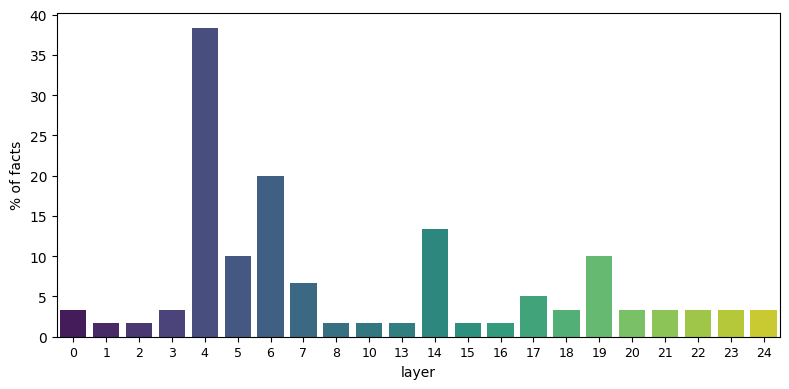

In [169]:
# ("found features", found_features_df)
for name, features_df in [("min features", min_features_df)]:
    print(f"{name}")
    layer_counts = features_df.pivot_table(
        index='layer', 
        values='example', 
        aggfunc='nunique'
    ).reset_index()

    total_examples = features_df['example'].nunique()
    
    layer_counts['percentage'] = (layer_counts['example'] / total_examples) * 100

    plt.figure(figsize=(8, 4))
    sns.barplot(x='layer', y='percentage', data=layer_counts, palette='viridis')
    
    plt.ylabel('% of facts')
    plt.xlabel('layer')
    #plt.xticks(rotation=45, fontsize=10)
    plt.xticks(fontsize=9)
    plt.tight_layout()
    plt.savefig("4.pdf", format="pdf")
    plt.show()

## Final Pipeline: Figure 5

In [180]:
count_matrix = features_df.pivot_table(
        index='layer', 
        columns='example', 
        values='layer_index', 
        aggfunc='count', 
        fill_value=0
    )
count_matrix.head()

example  Albert Einstein developed the theory of-> relativity  \
layer                                                           
0                                                        0      
1                                                        0      
2                                                        0      
3                                                        0      
4                                                        0      

example  Albert Einstein was awarded the-> Nobel  \
layer                                              
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

example  Alexander Graham Bell invented the-> telephone  \
layer                                                     
0                                                     1   
1                                                     1   
2                                                     0   
3                                                     0   
4                                                     0   

example  Barack Obama was born in-> Hawaii  Beats is owned by-> Apple  \
layer                                                                   
0                                        0                          0   
1                                        0                          0   
2                                        0                          0   
3                                        0                          0   
4                                        0                          0   

example  Bill Gates is the founder of-> Microsoft  \
layer                                               
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

example  Charles Darwin wrote the-> Origin  \
layer                                        
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

example  Cleopatra was the queen of-> Egypt  Elon Musk is the CEO of-> Tesla  \
layer                                                                          
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         1                                0   

example  Fidel Castro was the leader of-> Cuba  ...  \
layer                                           ...   
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   

example  The Sphinx is located in the country-> Egypt  \
layer                                                   
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   1   

example  The Statue of Liberty was a gift from-> France  \
layer                                                     
0                                                     0   
1                                 

In [182]:
count_matrix.index

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24],
      dtype='int64', name='layer')

min features


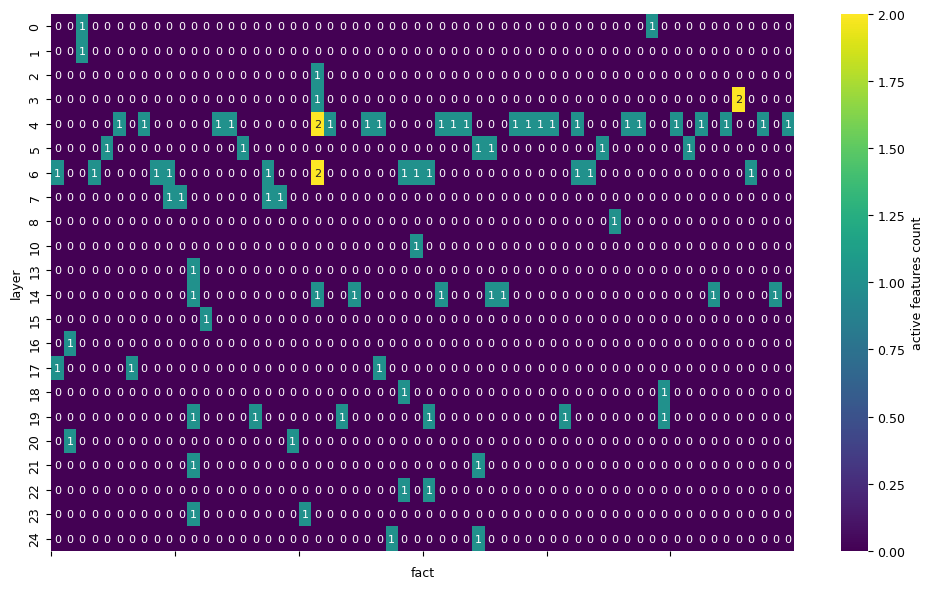

In [195]:
# ("found features", found_features_df)
for name, features_df in [("min features", min_features_df)]:
    print(f"{name}")

    count_matrix = features_df.pivot_table(
        index='layer', 
        columns='example', 
        values='layer_index', 
        aggfunc='count', 
        fill_value=0
    )

    # Set figure size for double-column width
    plt.figure(figsize=(10, 6))
    
    # Create heatmap with compact settings
    ax = sns.heatmap(
        count_matrix,
        annot=True, 
        annot_kws={"size": 8},     # Small font for annotations
        cmap='viridis',
        cbar_kws={'label': 'Active Features Count'}
    )
    
    # Display x-ticks every 10th column for clarity, rotate for compactness
    ax.set_xticks(range(0, len(count_matrix.columns), 10))
    #ax.set_xticklabels(count_matrix.columns[::10], fontsize=5)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    
    # Label axes with compact fonts
    plt.xlabel('fact', fontsize=9)
    plt.ylabel('layer', fontsize=9)
    
    # Adjust color bar font size
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=9)
    cbar.set_label('active features count', fontsize=9)
    
    plt.tight_layout()
    plt.savefig("5.pdf", format="pdf")
    plt.show()

## Final Pipeline: Figure 6

min features


/tmp/ipykernel_159273/3654604295.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


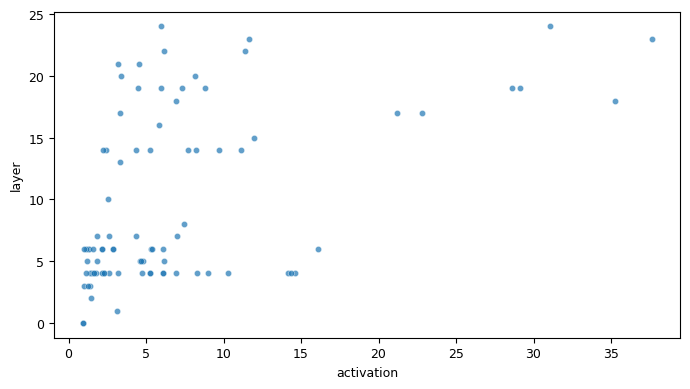

In [204]:
# ("found features", found_features_df)
for name, features_df in [("min features", min_features_df)]:
    print(f"{name}")
    # Adjusted figure size for double-column layout
    plt.figure(figsize=(7, 4))
    
    # Scatter plot with reduced marker size and compact settings
    sns.scatterplot(
        x='activation', 
        y='layer', 
        data=features_df, 
        palette='viridis', 
        s=20,  # Smaller marker size for clarity
        alpha=0.7  # Slight transparency to reduce overlap
    )
    
    # Set title and labels with smaller fonts
    plt.ylabel('layer', fontsize=9)
    plt.xlabel('activation', fontsize=9)
    
    # Adjust tick labels for readability
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    # Tight layout for compactness
    plt.tight_layout()
    plt.savefig("6.pdf", format="pdf")
    plt.show()

## Final Pipeline: Figure 7

In [207]:
min_features_df.head()

example      object  \
0                  Barack Obama was born in-> Hawaii      Hawaii   
1            George Bush was the governor of-> Texas       Texas   
2                          Beats is owned by-> Apple       Apple   
3           Bill Gates is the founder of-> Microsoft   Microsoft   
4  The Dalai Lama is a spiritual leader from-> Tibet       Tibet   

        subject  layer  index  activation  \
0  Barack Obama      6  62465    1.282317   
1   George Bush      7  64391    4.383185   
2         Beats      5  34531    6.172657   
3    Bill Gates      4  29067   14.627275   
4    Dalai Lama      4    435    5.269289   

                              layer_index  
0  layer_6/width_65k/average_l0_101/62465  
1  layer_7/width_65k/average_l0_115/64391  
2   layer_5/width_65k/average_l0_86/34531  
3   layer_4/width_65k/average_l0_66/29067  
4     layer_4/width_65k/average_l0_66/435

In [209]:
min_features_df['feature'] = min_features_df['layer'].astype(str) + '/' + min_features_df['index'].astype(str)
min_features_df.head()

example      object  \
0                  Barack Obama was born in-> Hawaii      Hawaii   
1            George Bush was the governor of-> Texas       Texas   
2                          Beats is owned by-> Apple       Apple   
3           Bill Gates is the founder of-> Microsoft   Microsoft   
4  The Dalai Lama is a spiritual leader from-> Tibet       Tibet   

        subject  layer  index  activation  \
0  Barack Obama      6  62465    1.282317   
1   George Bush      7  64391    4.383185   
2         Beats      5  34531    6.172657   
3    Bill Gates      4  29067   14.627275   
4    Dalai Lama      4    435    5.269289   

                              layer_index  feature  
0  layer_6/width_65k/average_l0_101/62465  6/62465  
1  layer_7/width_65k/average_l0_115/64391  7/64391  
2   layer_5/width_65k/average_l0_86/34531  5/34531  
3   layer_4/width_65k/average_l0_66/29067  4/29067  
4     layer_4/width_65k/average_l0_66/435    4/435

min features


/tmp/ipykernel_159273/2004318081.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='feature', y='count', data=top_layers, palette='viridis')


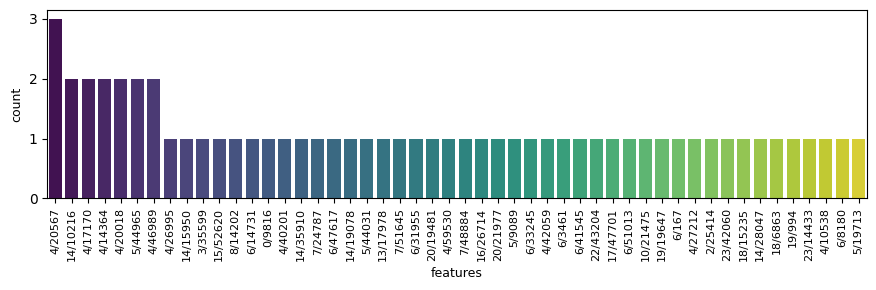

In [216]:
# ("found features", found_features_df)
for name, features_df in [("min features", min_features_df)]:
    print(f"{name}")
    # Count occurrences of each layer index
    layer_count = features_df['feature'].value_counts().reset_index()
    layer_count.columns = ['feature', 'count']
    
    # Select top N features
    top_n = 50
    top_layers = layer_count.head(top_n)
    
    # Set up figure for ACL paper
    plt.figure(figsize=(9, 3))  # Suitable for double-column width
    
    # Plot with compact settings
    sns.barplot(x='feature', y='count', data=top_layers, palette='viridis')
    
    # Title and labels with reduced font sizes
    plt.ylabel('count', fontsize=9)
    plt.xlabel('features', fontsize=9)
    
    # Limit x-tick labels for clarity
    plt.xticks(rotation=90, fontsize=8)
    
    # Adjust layout for compactness
    plt.tight_layout()
    
    # Save as high-resolution PDF for ACL paper
    plt.savefig("7.pdf", format="pdf", dpi=300)
    
    plt.show()